In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import os
import math
import scipy
from tqdm import tqdm
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
#dropping the unnecessary data
df.drop(columns=["Unnamed: 0" , "key"],inplace=True)

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# Convert pickup_datetime to datetime type
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [13]:
# Check for any other inconsistencies or outliers
summary_stats=df.describe()

In [14]:
summary_stats

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [15]:
# Remove outliers in fare_amount
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 500)]

In [16]:
min_longitude, max_longitude = -74.05, -73.75
min_latitude, max_latitude = 40.63, 40.85

In [17]:
# Remove entries with unrealistic pickup and dropoff coordinates
df = df[(df['pickup_longitude'].between(min_longitude, max_longitude)) &
                      (df['pickup_latitude'].between(min_latitude, max_latitude)) &
                      (df['dropoff_longitude'].between(min_longitude, max_longitude)) &
                      (df['dropoff_latitude'].between(min_latitude, max_latitude))]

In [18]:
# Remove entries with unrealistic passenger counts
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192828 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        192828 non-null  float64            
 1   pickup_datetime    192828 non-null  datetime64[ns, UTC]
 2   pickup_longitude   192828 non-null  float64            
 3   pickup_latitude    192828 non-null  float64            
 4   dropoff_longitude  192828 non-null  float64            
 5   dropoff_latitude   192828 non-null  float64            
 6   passenger_count    192828 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 11.8 MB


In [19]:
cleaned_summary_stats = df.describe()
cleaned_summary_stats

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000
mean,11.039133,-73.975706,40.750877,-73.974611,40.751016,1.689340
std,8.922390,0.033656,0.026330,0.032082,0.028579,1.305503
min,0.010000,-74.049495,40.630197,-74.049012,40.630055,1.000000
25%,6.000000,-73.992273,40.736551,-73.991570,40.735610,1.000000
50%,8.500000,-73.982133,40.753305,-73.980621,40.753732,1.000000
75%,12.500000,-73.968500,40.767465,-73.965876,40.768160,2.000000
max,499.000000,-73.753962,40.849964,-73.750620,40.849997,6.000000


In [20]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["weekday"] = df["pickup_datetime"].dt.weekday
df["hour"] = df["pickup_datetime"].dt.hour

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [22]:
df["month"].unique()

array([ 5,  7,  8,  6,  2, 10,  3,  4,  9, 11,  1, 12])

In [23]:
#Map the month column
df["Monthly_Quarter"] = df["month"].apply(lambda x: "Q1" if x in [1,2,3] else(
                                              "Q2" if x in [4,5,6] else( "Q3" if x in [7,8,9] else( 
                                              "Q4"))))

In [24]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3


In [25]:
df["Monthly_Quarter"].unique()

array(['Q2', 'Q3', 'Q1', 'Q4'], dtype=object)

In [26]:
df["hour"].unique()

array([19, 20, 21,  8, 17,  2,  7,  9, 14, 11, 22, 23,  0, 16,  6, 15,  5,
       10, 18, 13,  3,  1,  4, 12])

In [27]:
df["Hourly_Segments"] = df["hour"].apply(lambda x: "H1" if x in [0,1,2,3] 
                                             else("H2" if x in [4,5,6,7] else("H3" if x in [8,9,10,11]
                                                                             else("H4" if x in [12,13,14,15]
                                                                                 else("H5" if x in [16,17,18,19]
                                                                                     else("H6"))))))

In [28]:
from geopy.distance import geodesic
distances = []

for i in df.index:
    pickup_coords = (df["pickup_latitude"][i], df["pickup_longitude"][i])
    dropoff_coords = (df["dropoff_latitude"][i], df["dropoff_longitude"][i])
    distance = round(geodesic(pickup_coords,dropoff_coords).m,2)
    distances.append(distance)
    
df["distance"] = distances

In [29]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter,Hourly_Segments,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5,1681.11
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6,2454.36
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6,5039.60
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3,1661.44
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3,H5,4483.73


In [30]:
df.drop(["pickup_datetime","month","hour"], axis = 1, inplace = True)

In [31]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4483.73


In [32]:
original_data = df.copy(deep = True)

In [33]:
original_data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4483.73
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,6,Q4,H3,112.13
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,4,Q1,H1,1879.64
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,0,Q2,H1,12867.92
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,2,Q2,H4,3536.55


In [34]:
unique_counts = df.drop(["fare_amount"], axis = 1).nunique().sort_values()

In [35]:
# Separating numerical and categorical features
numerical_features = []
categorical_features = []

for feature, count in unique_counts.items():
    if count <= 24:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)
        
print(len(numerical_features))
print(len(categorical_features))

5
5


In [36]:
display(df.describe())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance
count,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000
mean,11.039133,-73.975706,40.750877,-73.974611,40.751016,1.689340,2011.741236,3.047472,3210.173120
std,8.922390,0.033656,0.026330,0.032082,0.028579,1.305503,1.861846,1.946346,3373.859202
min,0.010000,-74.049495,40.630197,-74.049012,40.630055,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992273,40.736551,-73.991570,40.735610,1.000000,2010.000000,1.000000,1252.322500
50%,8.500000,-73.982133,40.753305,-73.980621,40.753732,1.000000,2012.000000,3.000000,2140.710000
75%,12.500000,-73.968500,40.767465,-73.965876,40.768160,2.000000,2013.000000,5.000000,3833.857500
max,499.000000,-73.753962,40.849964,-73.750620,40.849997,6.000000,2015.000000,6.000000,26253.010000


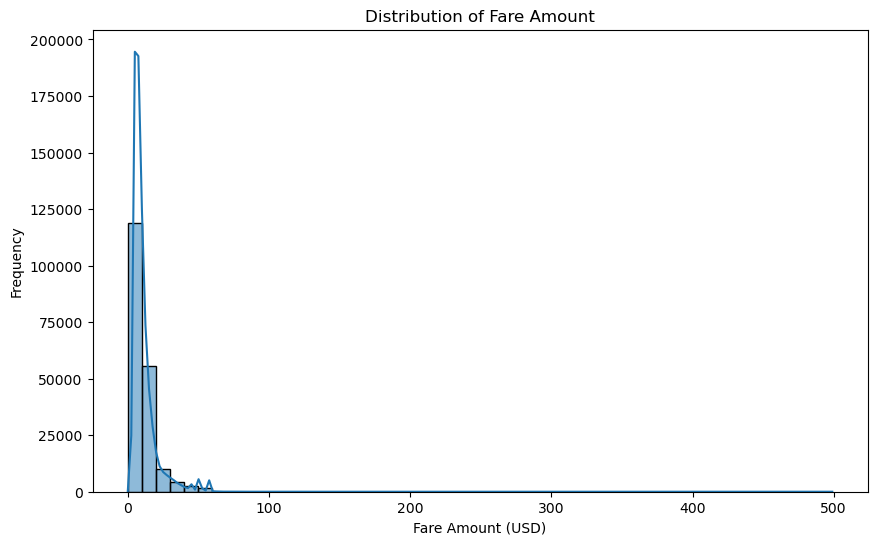

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency')
plt.show()

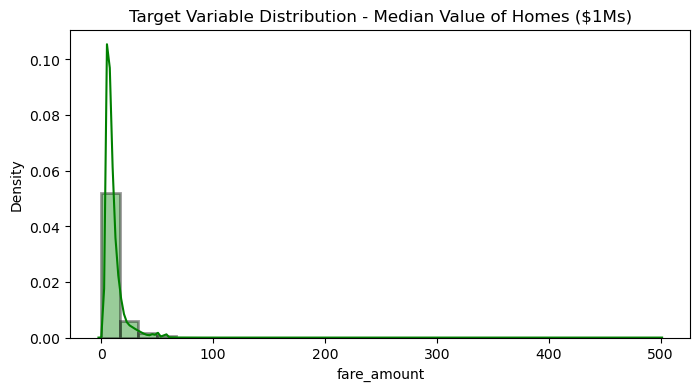

In [38]:
plt.figure(figsize=[8,4])
sns.distplot(df["fare_amount"], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)

plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Text(0, 0.5, 'Frequency')

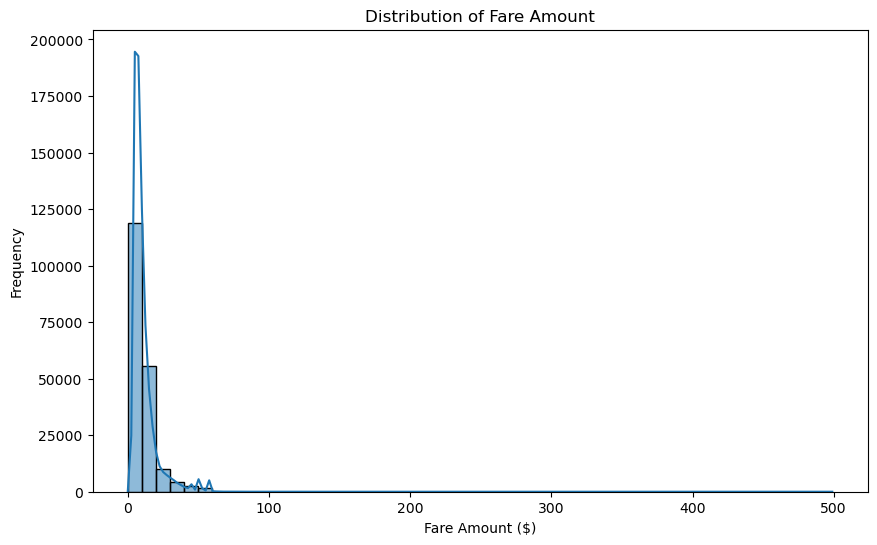

In [39]:
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

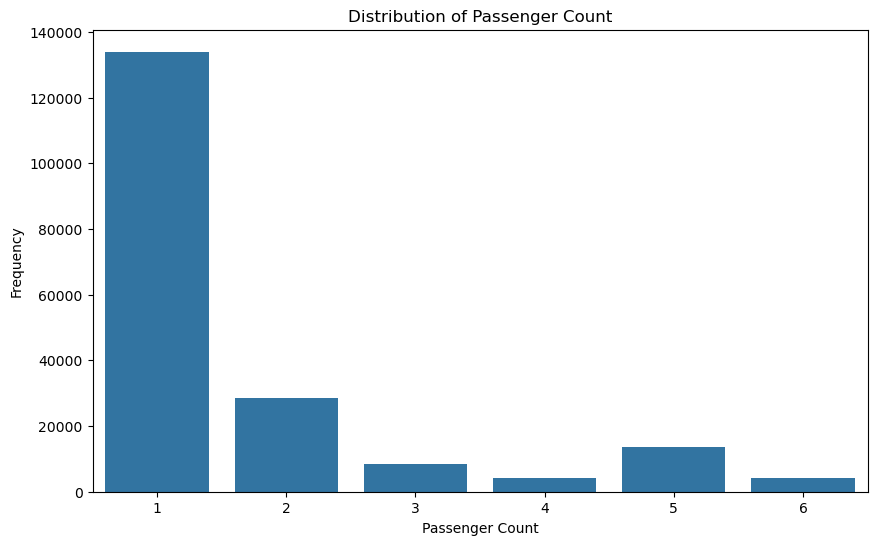

In [40]:
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

In [41]:
categorical_features

['Monthly_Quarter', 'passenger_count', 'Hourly_Segments', 'year', 'weekday']

In [42]:
categorical_column = df[['Monthly_Quarter', 'Hourly_Segments', 'weekday', 'year', 'passenger_count']]

In [43]:
categorical_column.head()

,Monthly_Quarter,Hourly_Segments,weekday,year,passenger_count
0,Q2,H5,3,2015,1
1,Q3,H6,4,2009,1
2,Q3,H6,0,2009,1
3,Q2,H3,4,2009,3
4,Q3,H5,3,2014,5


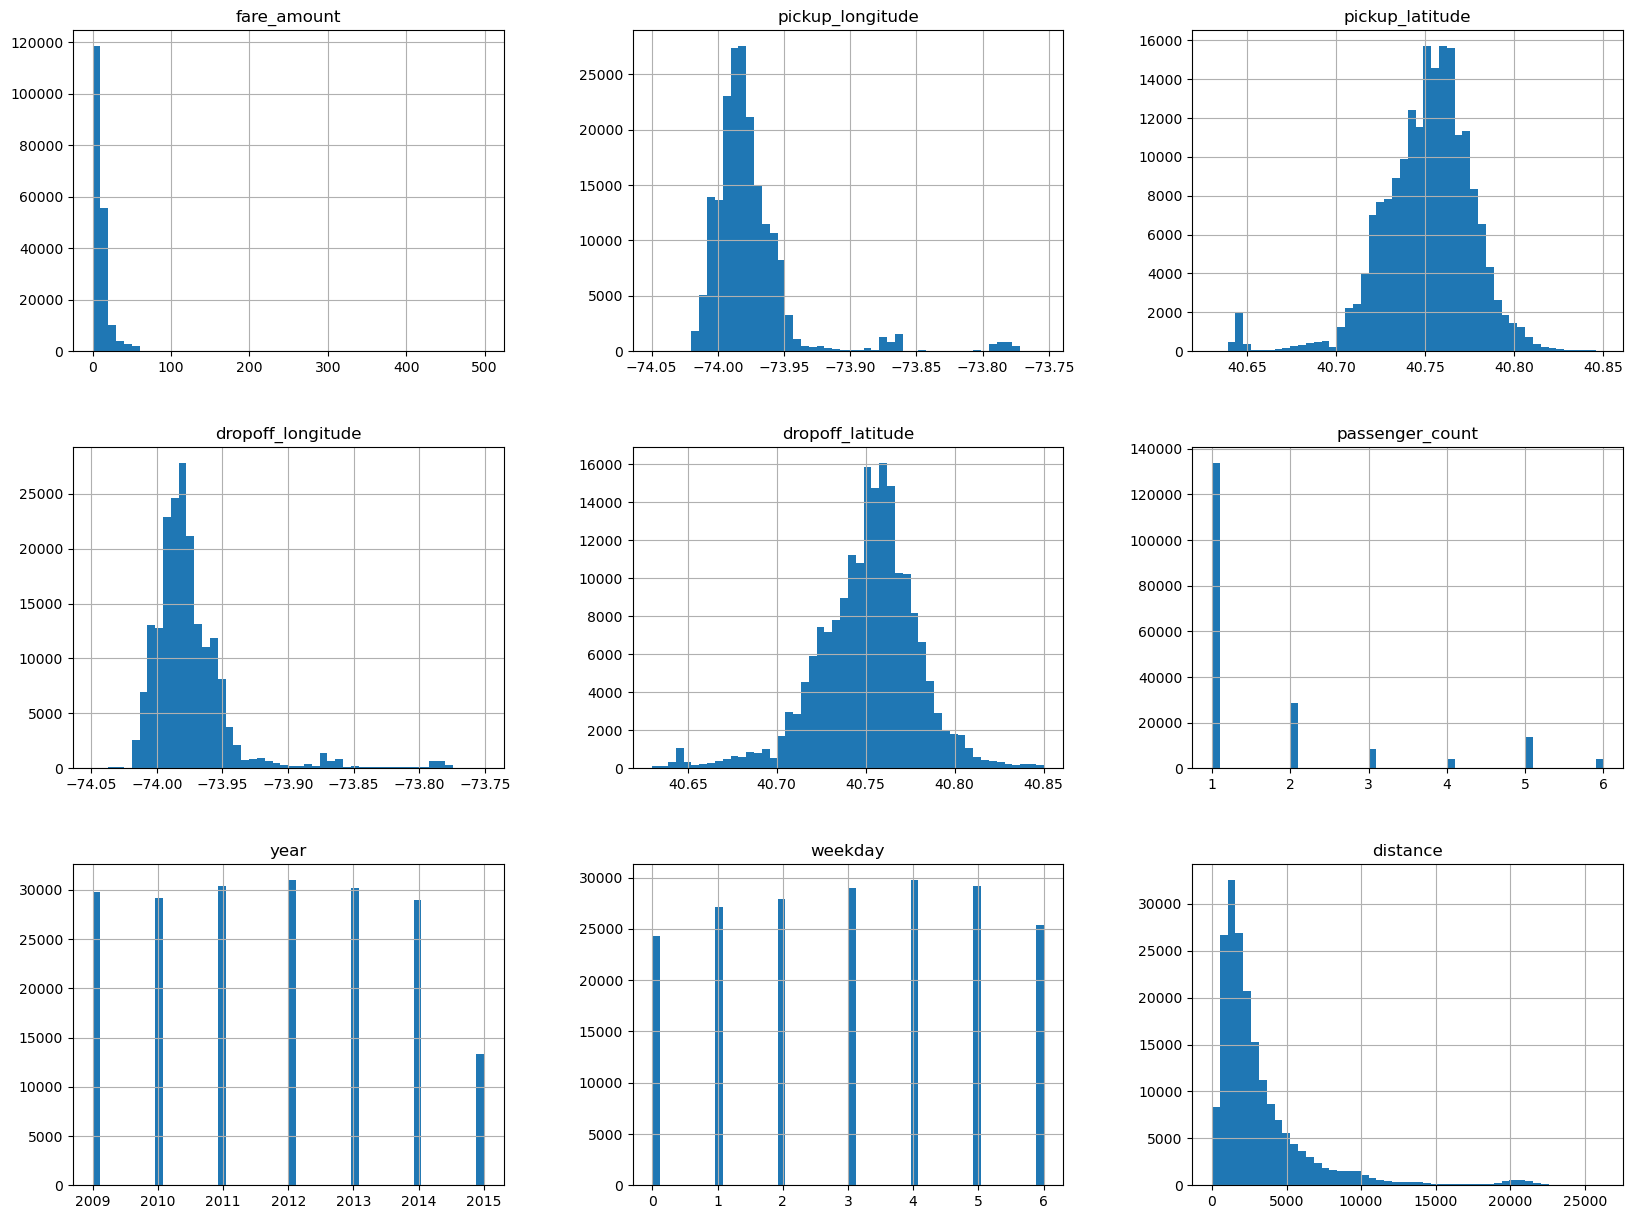

In [44]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

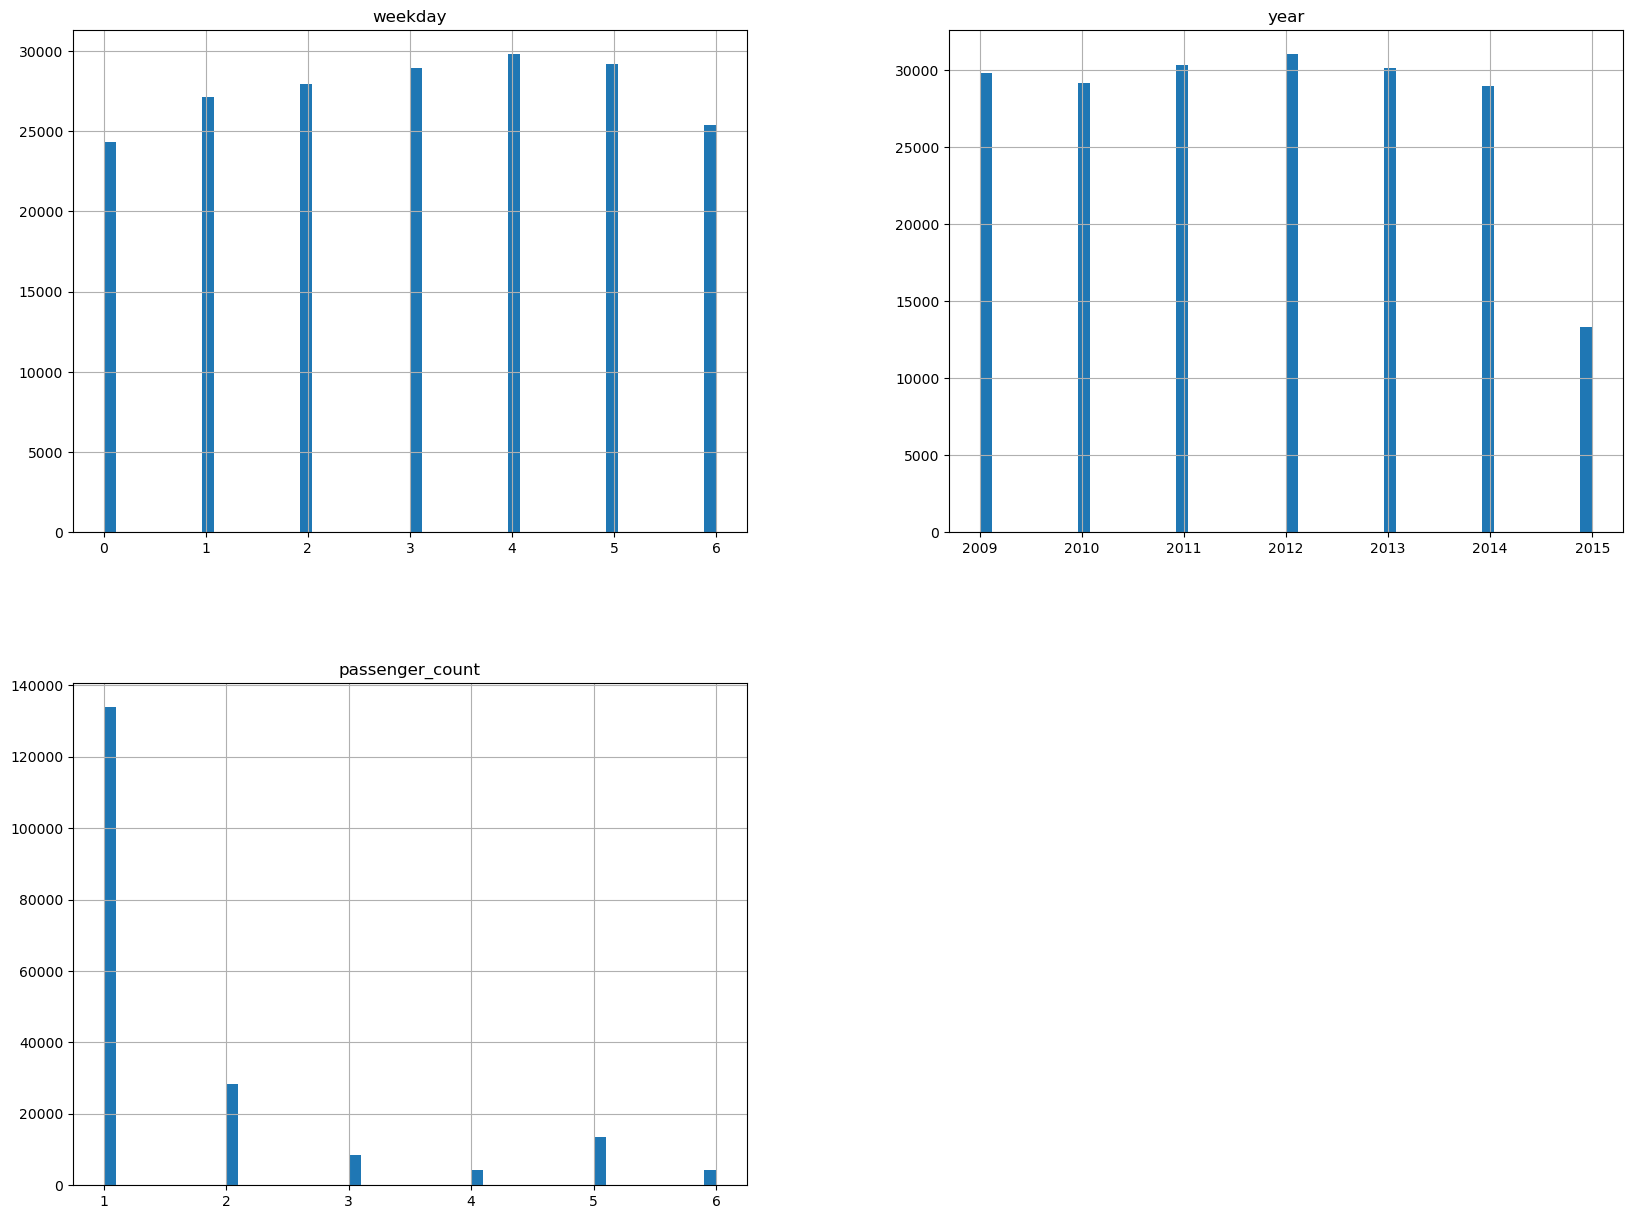

In [45]:
categorical_column.hist(bins = 50, figsize = (20,15))
plt.show()

Text(0, 0.5, 'Latitude')

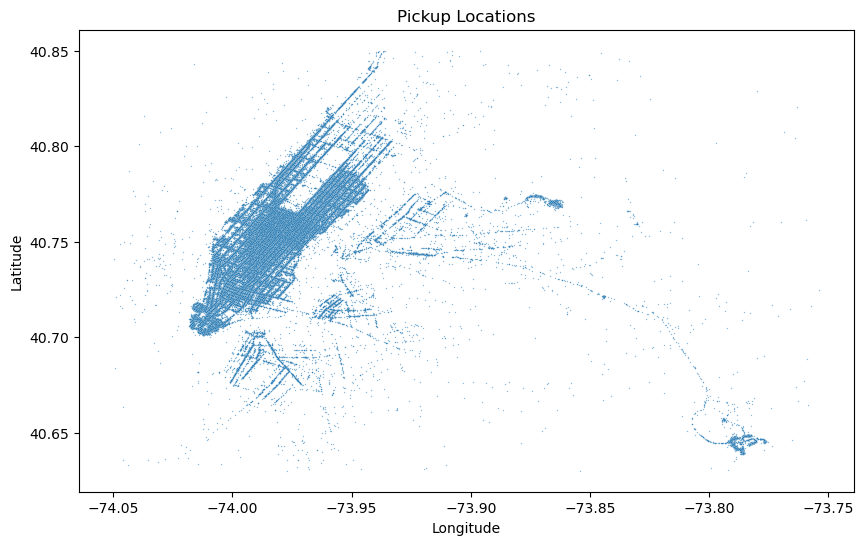

In [46]:
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, s=1, alpha=0.5)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

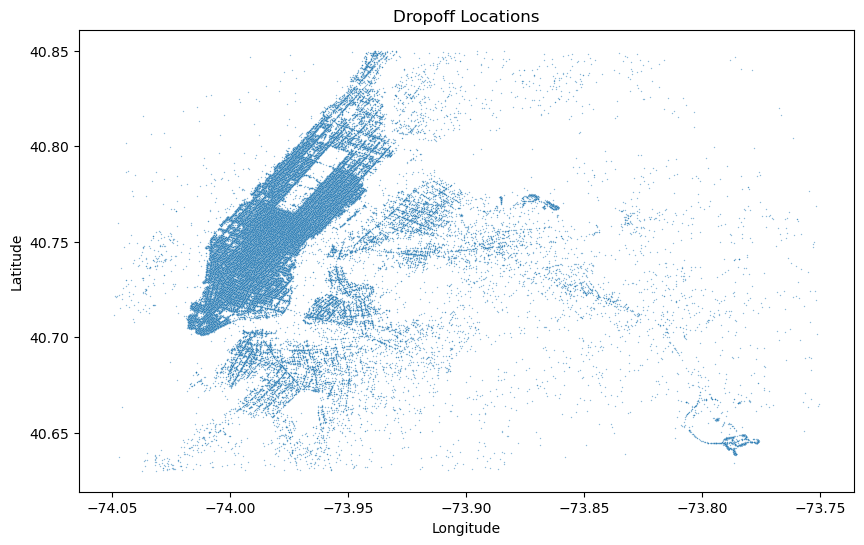

In [47]:
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, s=1, alpha=0.5)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Fare Amount ($)')

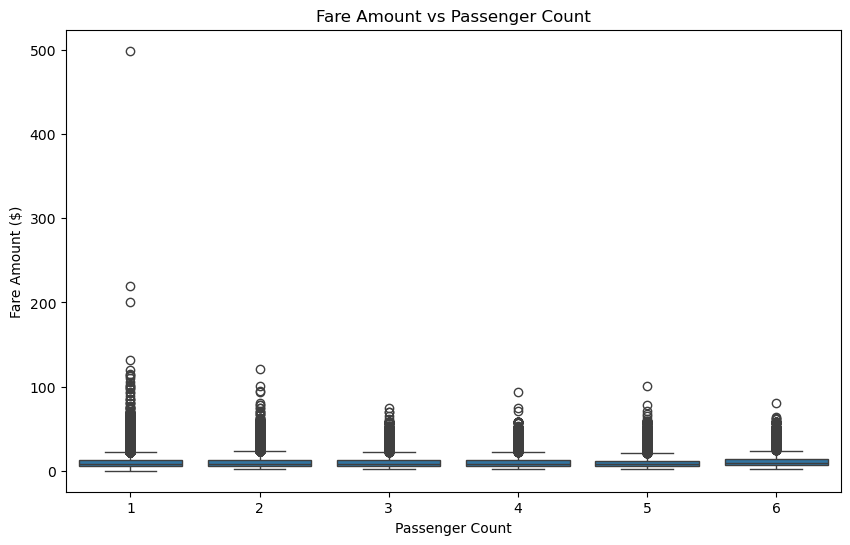

In [48]:
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')

Text(0, 0.5, 'Fare Amount ($)')

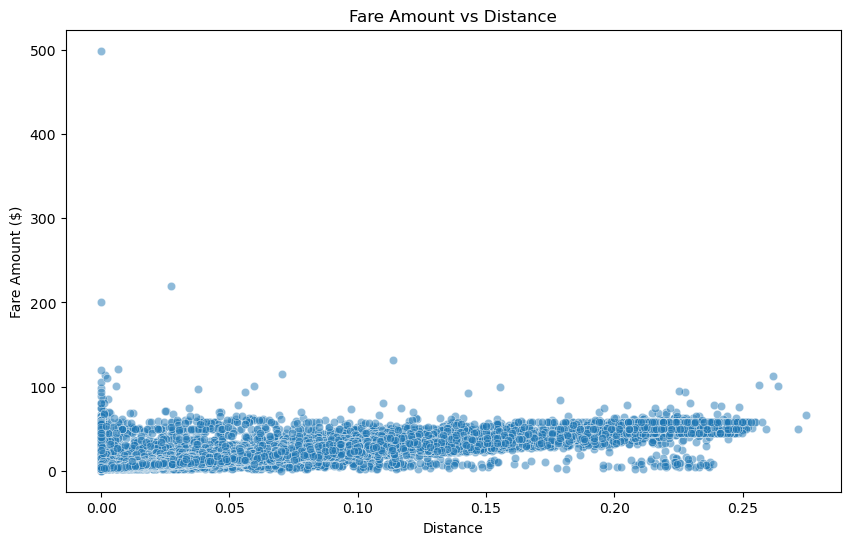

In [49]:
df['distance'] = ((df['pickup_longitude'] - df['dropoff_longitude'])**2 + 
                         (df['pickup_latitude'] - df['dropoff_latitude'])**2)**0.5

sns.scatterplot(x='distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare Amount ($)')

<Axes: xlabel='Monthly_Quarter', ylabel='count'>

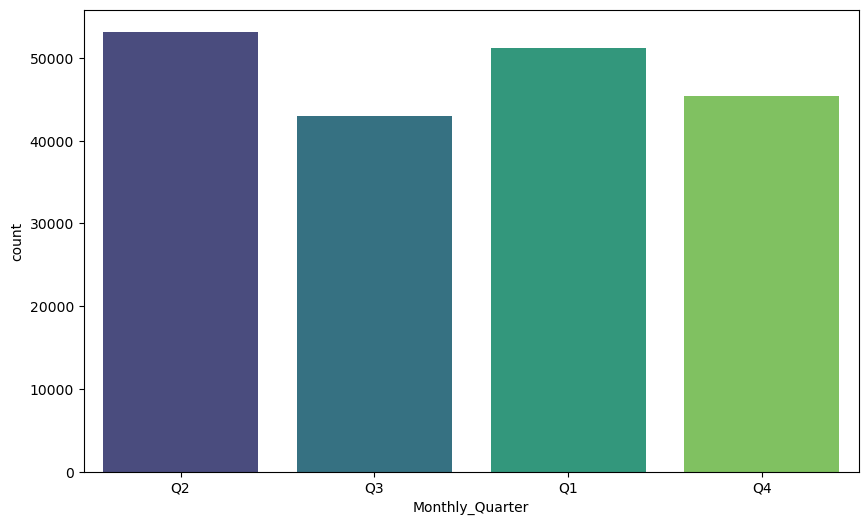

In [50]:
sns.countplot(x=df["Monthly_Quarter"], palette="viridis")

In [51]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'weekday', 'Monthly_Quarter', 'Hourly_Segments', 'distance'],
      dtype='object')

<Axes: xlabel='weekday', ylabel='count'>

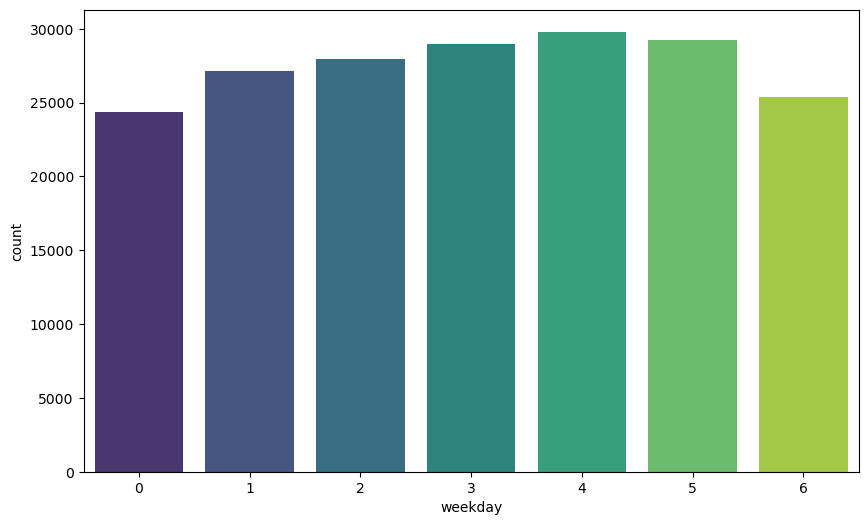

In [52]:
sns.countplot(x=df["weekday"], palette="viridis")

<Axes: xlabel='Monthly_Quarter', ylabel='count'>

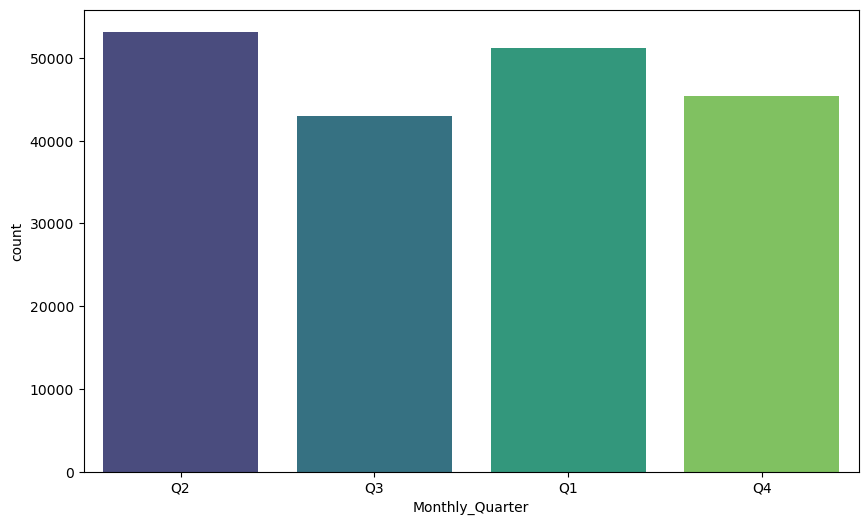

In [53]:
sns.countplot(x=df["Monthly_Quarter"], palette="viridis")

<Axes: xlabel='Hourly_Segments', ylabel='count'>

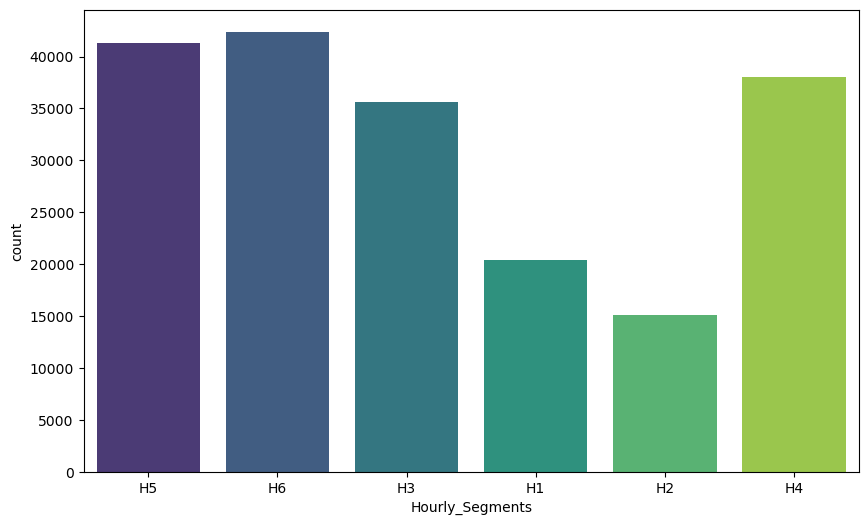

In [54]:
sns.countplot(x=df["Hourly_Segments"], palette="viridis")

<Axes: xlabel='passenger_count', ylabel='count'>

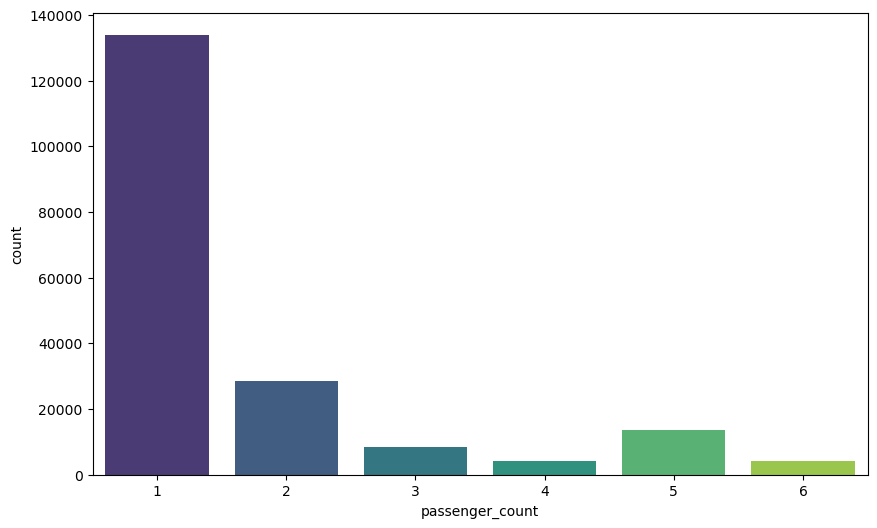

In [55]:
sns.countplot(x=df["passenger_count"], palette="viridis")

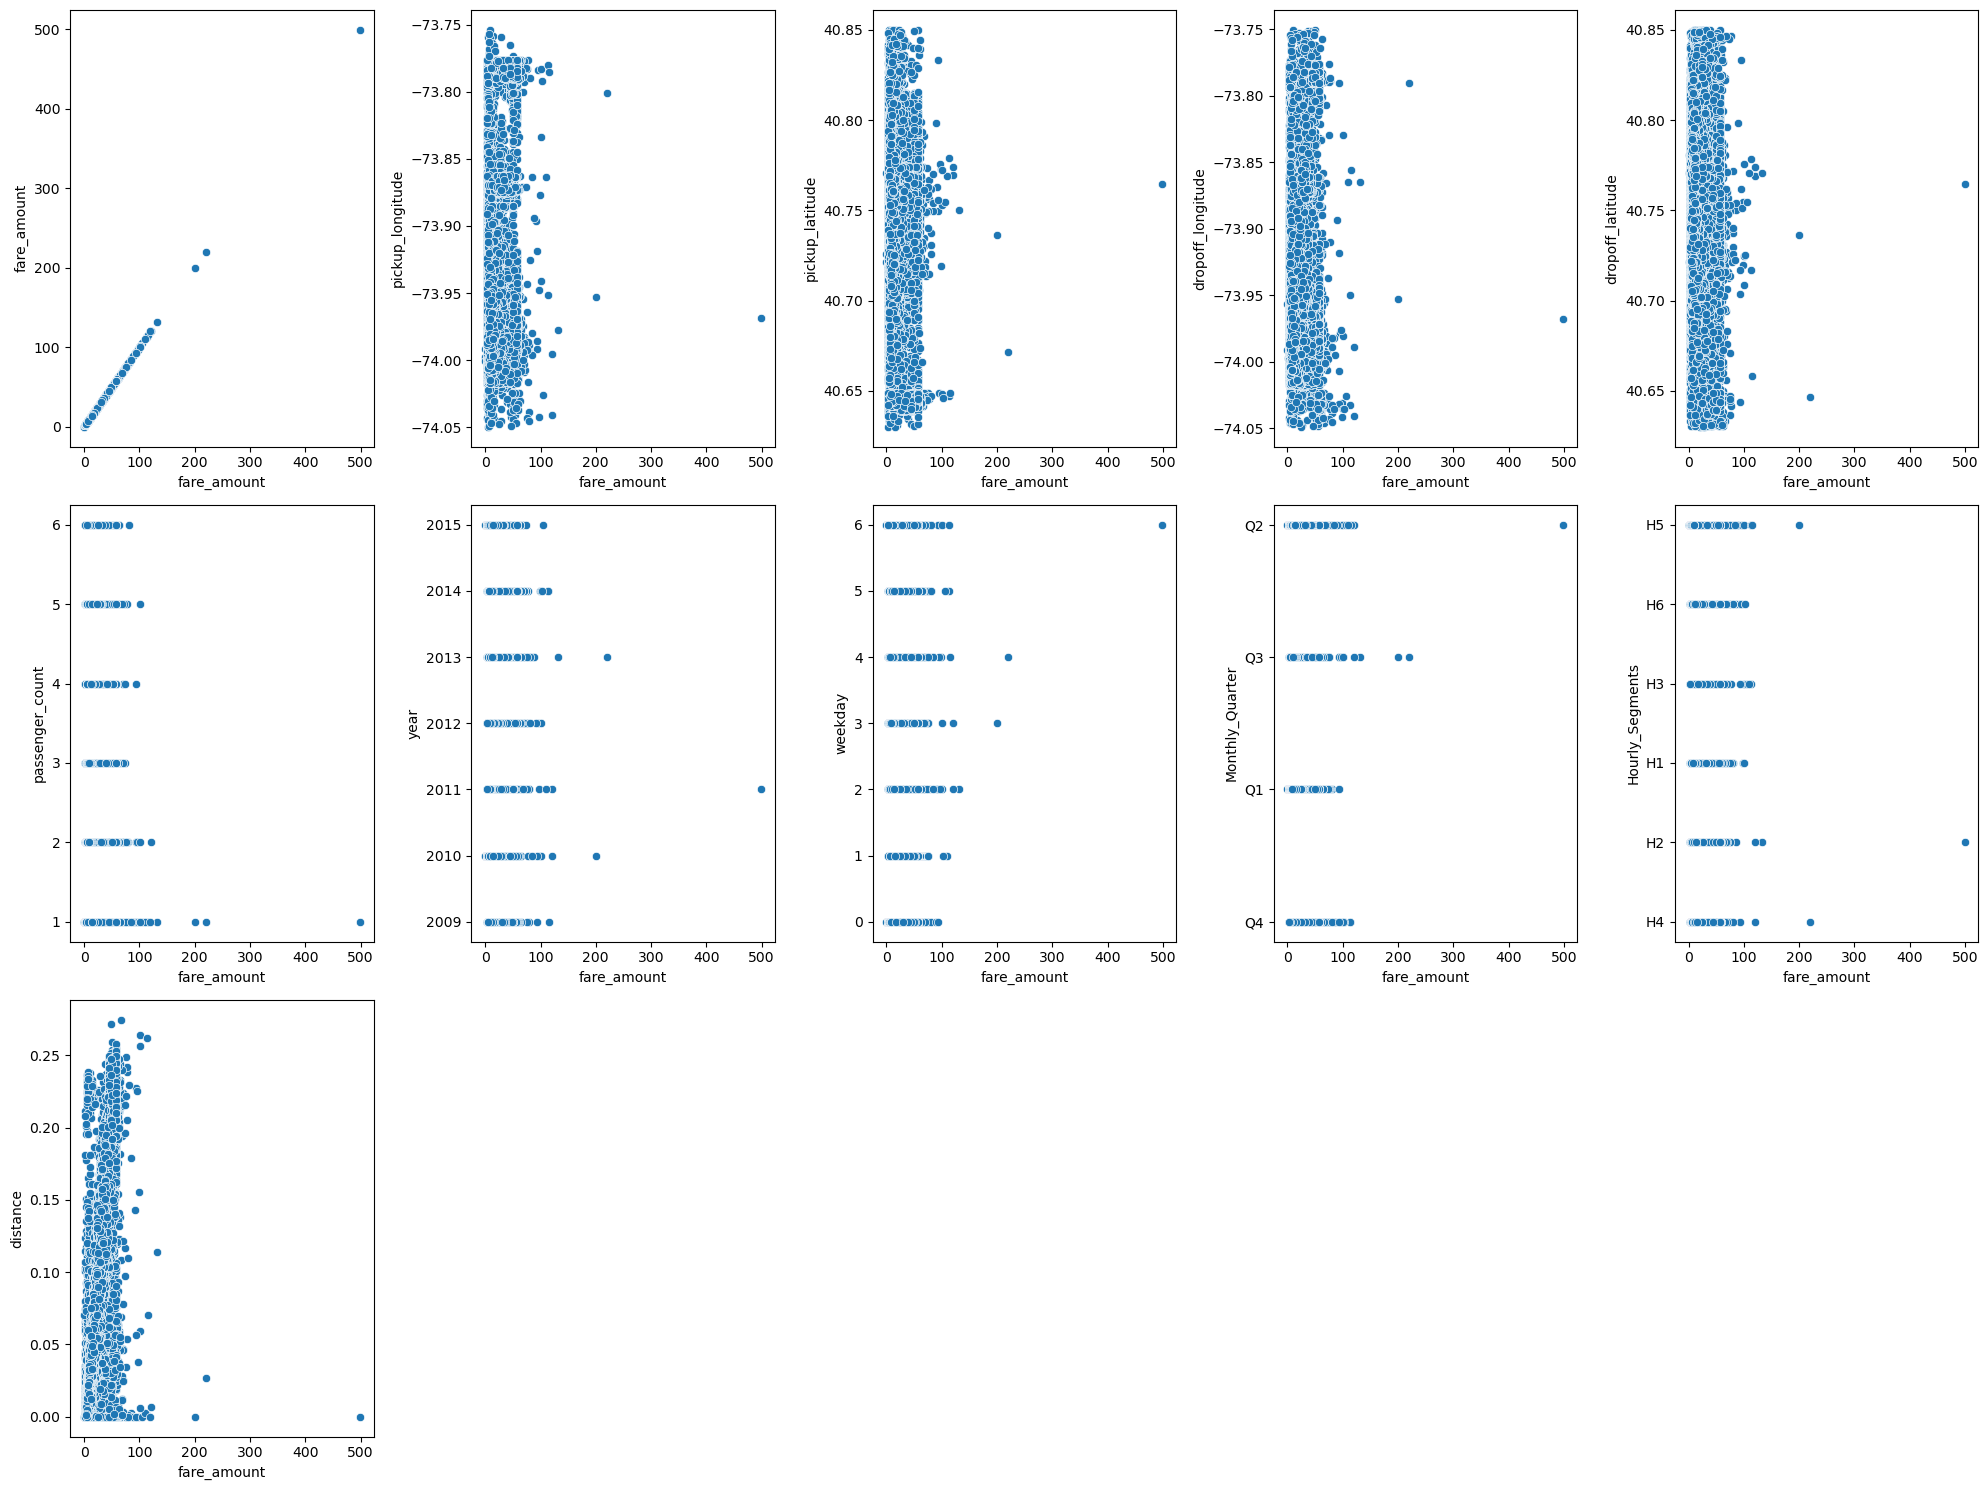

In [56]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 24:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df["fare_amount"], y = df[column])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

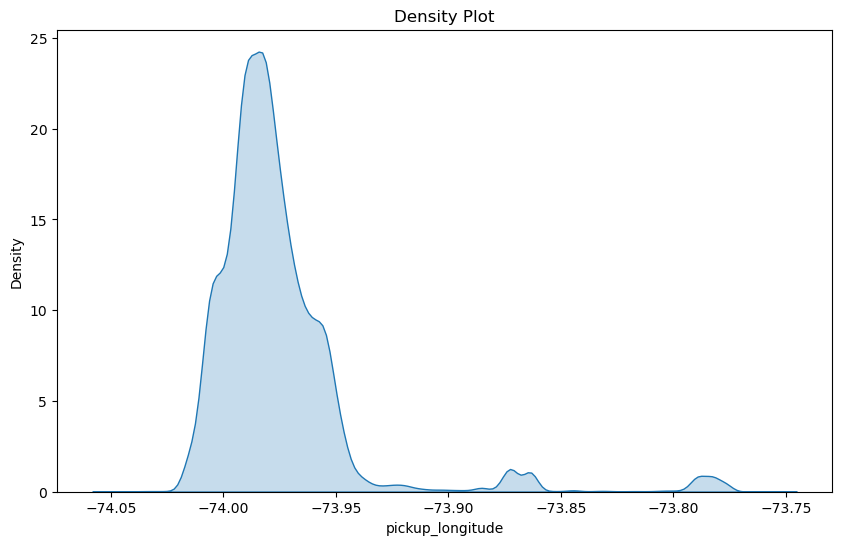

In [57]:
sns.kdeplot(df["pickup_longitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("pickup_longitude")
plt.ylabel("Density")
plt.show()

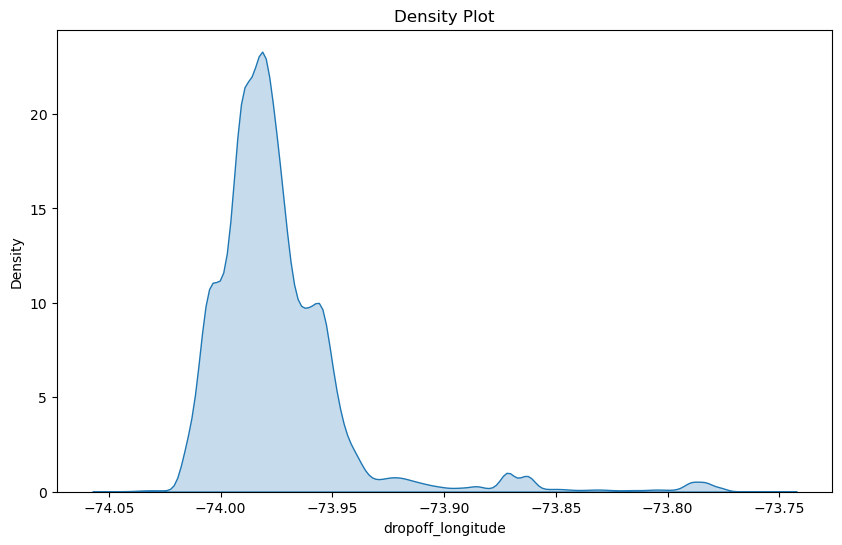

In [58]:
sns.kdeplot(df["dropoff_longitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("dropoff_longitude")
plt.ylabel("Density")
plt.show()

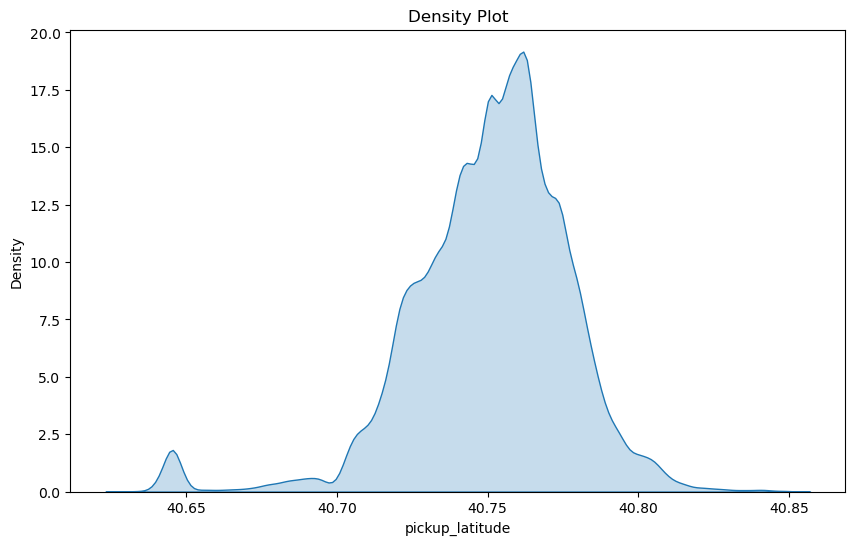

In [59]:
sns.kdeplot(df["pickup_latitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("pickup_latitude")
plt.ylabel("Density")
plt.show()

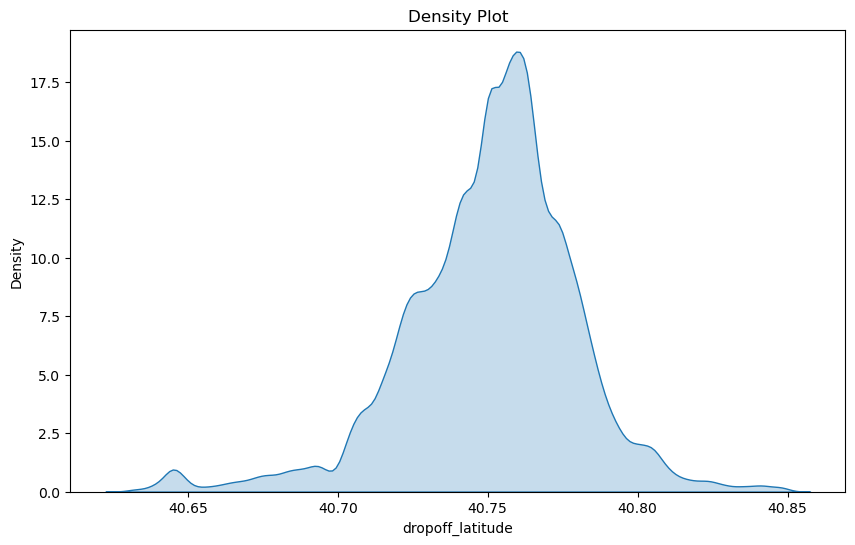

In [60]:
sns.kdeplot(df["dropoff_latitude"], shade=True)
plt.title("Density Plot")
plt.xlabel("dropoff_latitude")
plt.ylabel("Density")
plt.show()

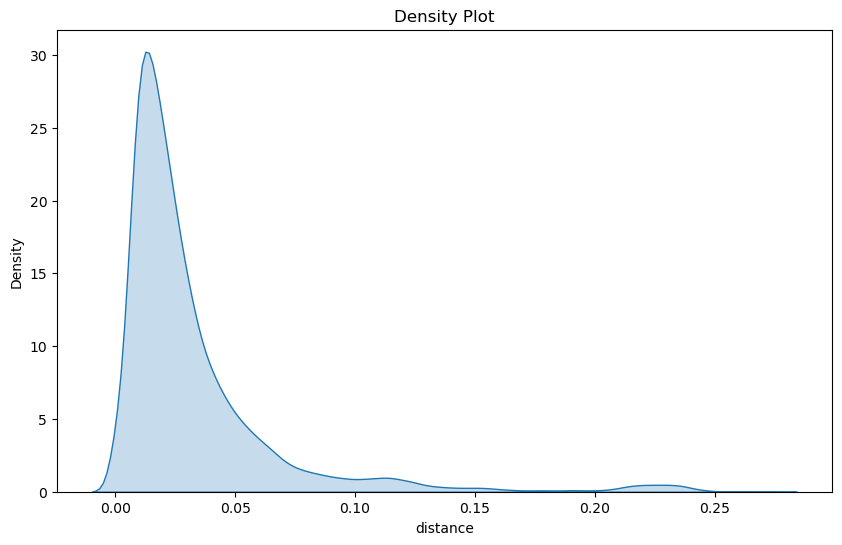

In [61]:
sns.kdeplot(df["distance"], shade=True)
plt.title("Density Plot")
plt.xlabel("distance")
plt.ylabel("Density")
plt.show()

In [62]:
#Removing outliers from the data frame
df1=df.copy(deep=True)

In [63]:
df1.shape

(192828, 11)

In [64]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'weekday', 'Monthly_Quarter', 'Hourly_Segments', 'distance'],
      dtype='object')

In [65]:
df2 = df[["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","distance"]]

In [66]:
df2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.051031


In [67]:
df2.shape

(192828, 6)

In [68]:
categorical_features

['Monthly_Quarter', 'passenger_count', 'Hourly_Segments', 'year', 'weekday']

In [69]:
df_dum = pd.get_dummies(df,columns = ['Monthly_Quarter', 'Hourly_Segments', 'weekday', 'year', 'passenger_count'],dtype = int, drop_first=True)

In [70]:
df_dum

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.015140,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.022103,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.053109,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.016528,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.051031,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,0.001064,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,0.022126,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,0.142223,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,0.033101,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
df_dum.shape

(192828, 31)

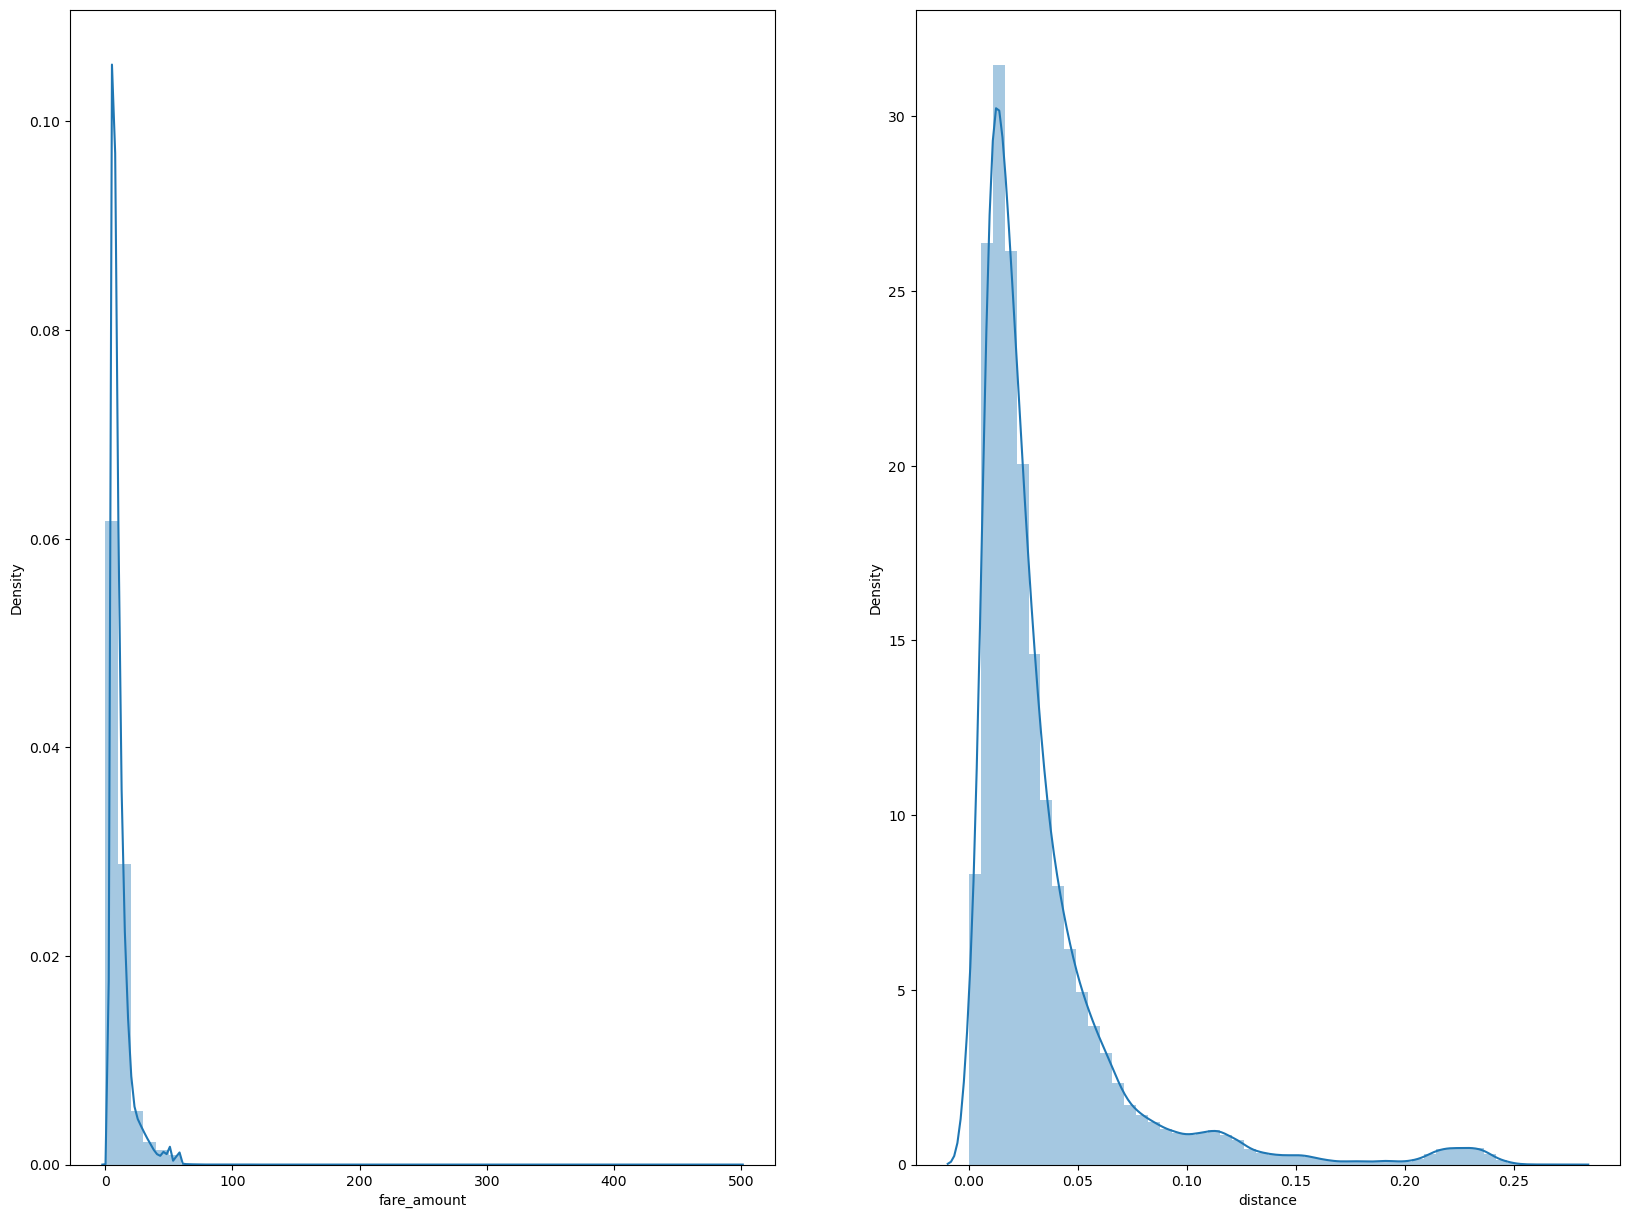

In [72]:
plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
sns.distplot(df_dum["fare_amount"])

plt.subplot(1,2,2)
sns.distplot(df_dum["distance"])
plt.show()

In [73]:
df_dum["fare_amount"].skew()

3.8107878256825636

<Axes: ylabel='fare_amount'>

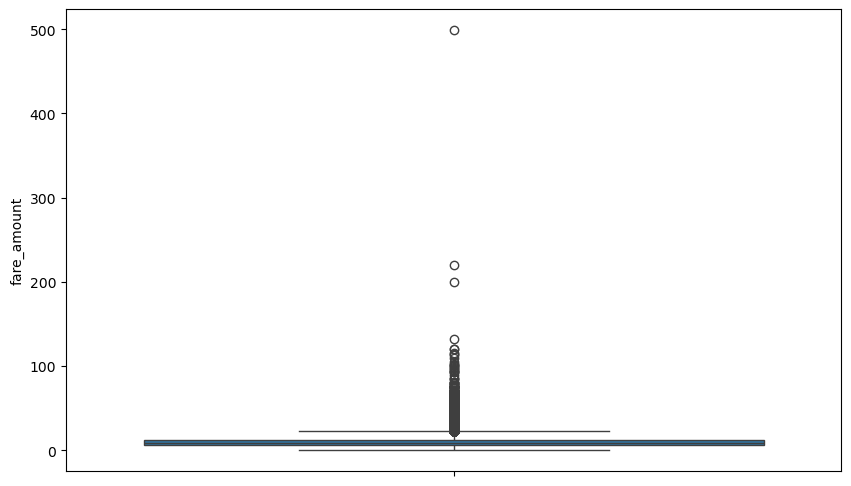

In [74]:
sns.boxplot(df_dum["fare_amount"])

In [75]:
df_dum["fare_amount"].describe()

count    192828.000000
mean         11.039133
std           8.922390
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [76]:
df_dum.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.015140,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.022103,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.053109,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.016528,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.051031,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


<Axes: xlabel='fare_amount', ylabel='Density'>

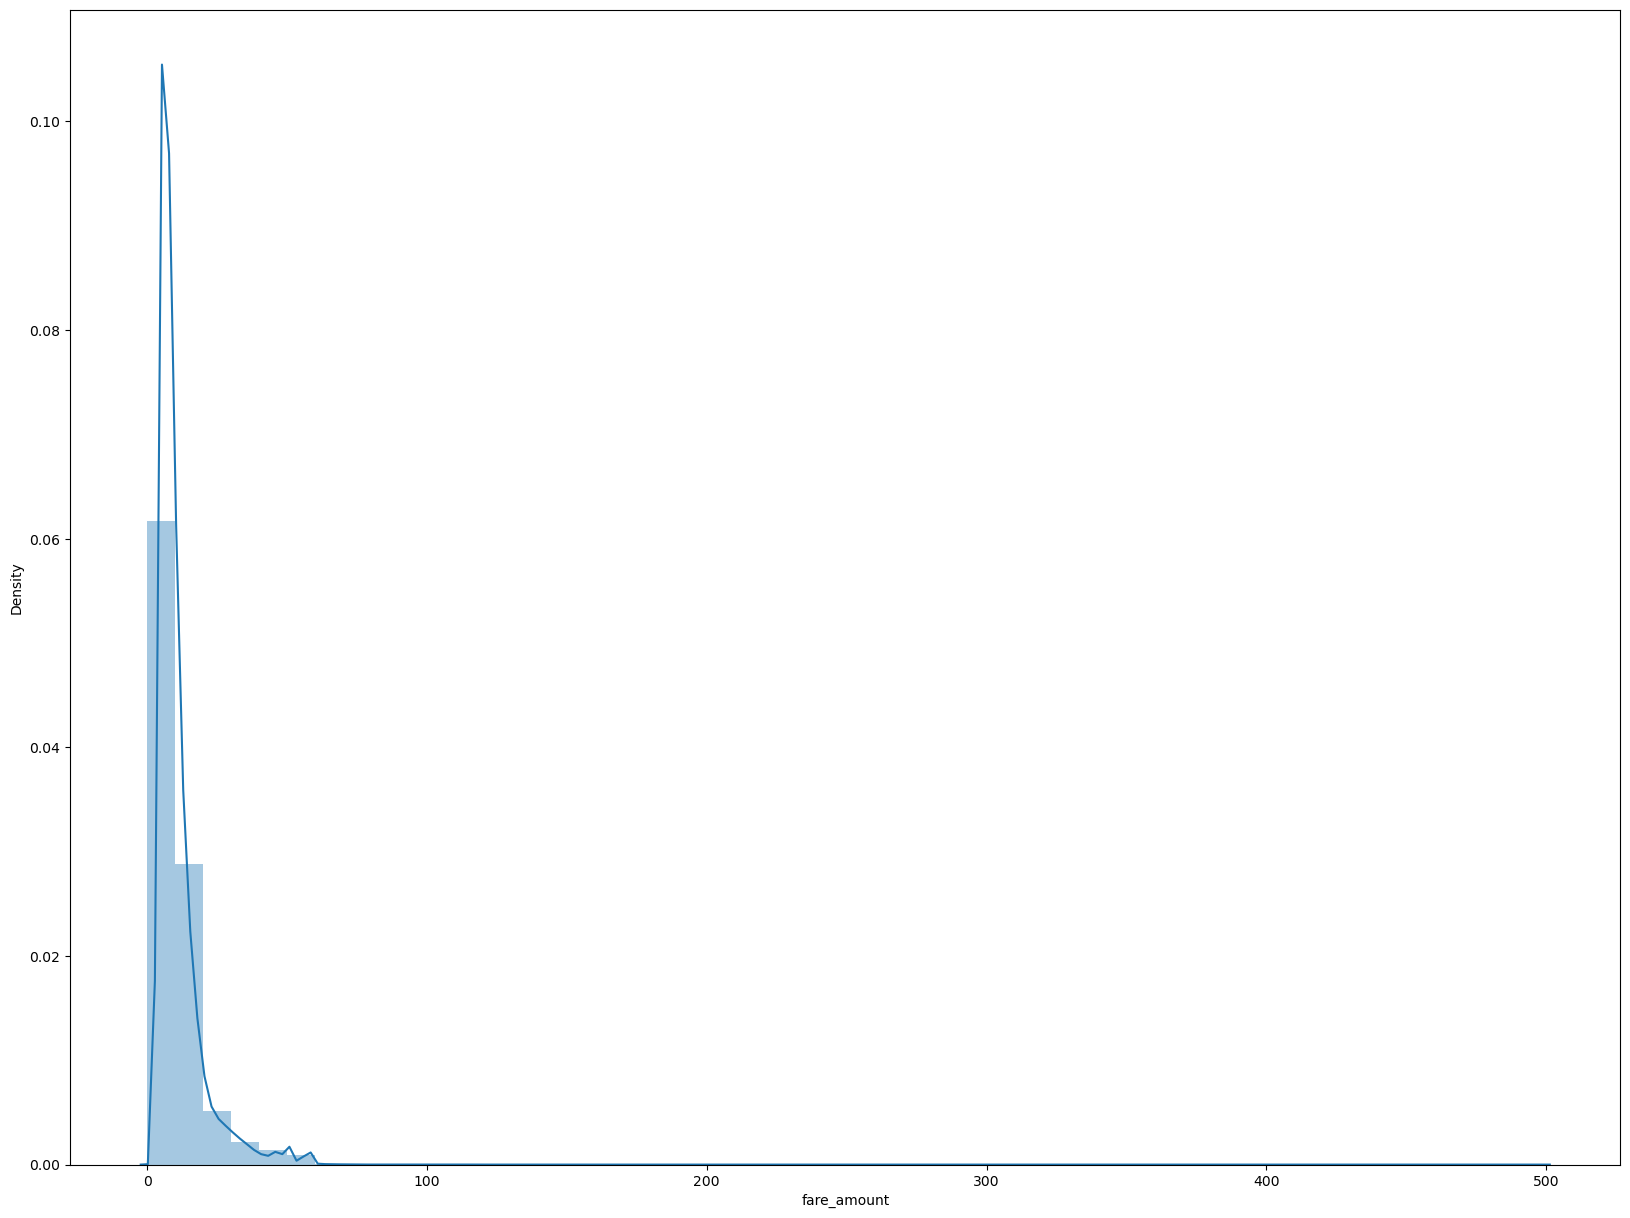

In [77]:
plt.figure(figsize = (20,15))
sns.distplot(df_dum["fare_amount"])

<Axes: ylabel='fare_amount'>

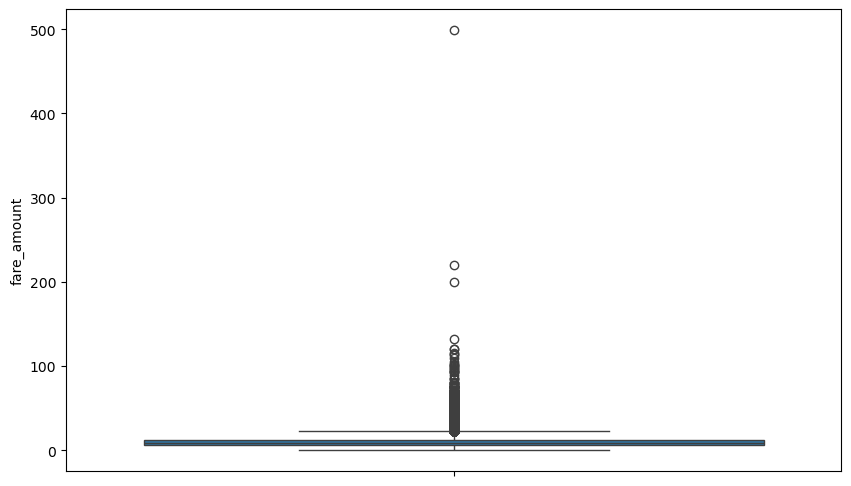

In [78]:
sns.boxplot(df_dum["fare_amount"])

In [79]:
#Find the outlier of the distance column in this data frame
percentile25 = df_dum["distance"].quantile(0.25)
percentile75 = df_dum["distance"].quantile(0.75)

In [80]:
IQR = percentile75 - percentile25

In [81]:
IQR

0.0251270490919481

In [82]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [83]:
df_dum[df_dum["distance"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
6,24.50,-73.961447,40.693965,-73.871195,40.774297,0.120825,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
30,25.70,-73.944815,40.834367,-73.989332,40.721920,0.120938,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
34,39.50,-73.788080,40.642187,-73.865042,40.725997,0.113786,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
39,29.00,-73.992600,40.753172,-73.908508,40.816192,0.105086,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
98,30.90,-73.995888,40.759078,-73.865005,40.770452,0.131376,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199957,24.50,-73.951662,40.773657,-73.861885,40.767337,0.089999,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
199960,24.50,-73.920354,40.847114,-73.994382,40.761012,0.113550,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
199972,45.00,-73.786833,40.639842,-74.001215,40.722429,0.229740,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199982,57.33,-73.969204,40.754771,-73.790351,40.643802,0.210482,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df_dum[df_dum["distance"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6


In [85]:
df_dum = df_dum.drop(df_dum[df_dum["distance"] > upperlimit].index)

In [86]:
df_dum.shape

(177240, 31)

<Axes: xlabel='distance', ylabel='Density'>

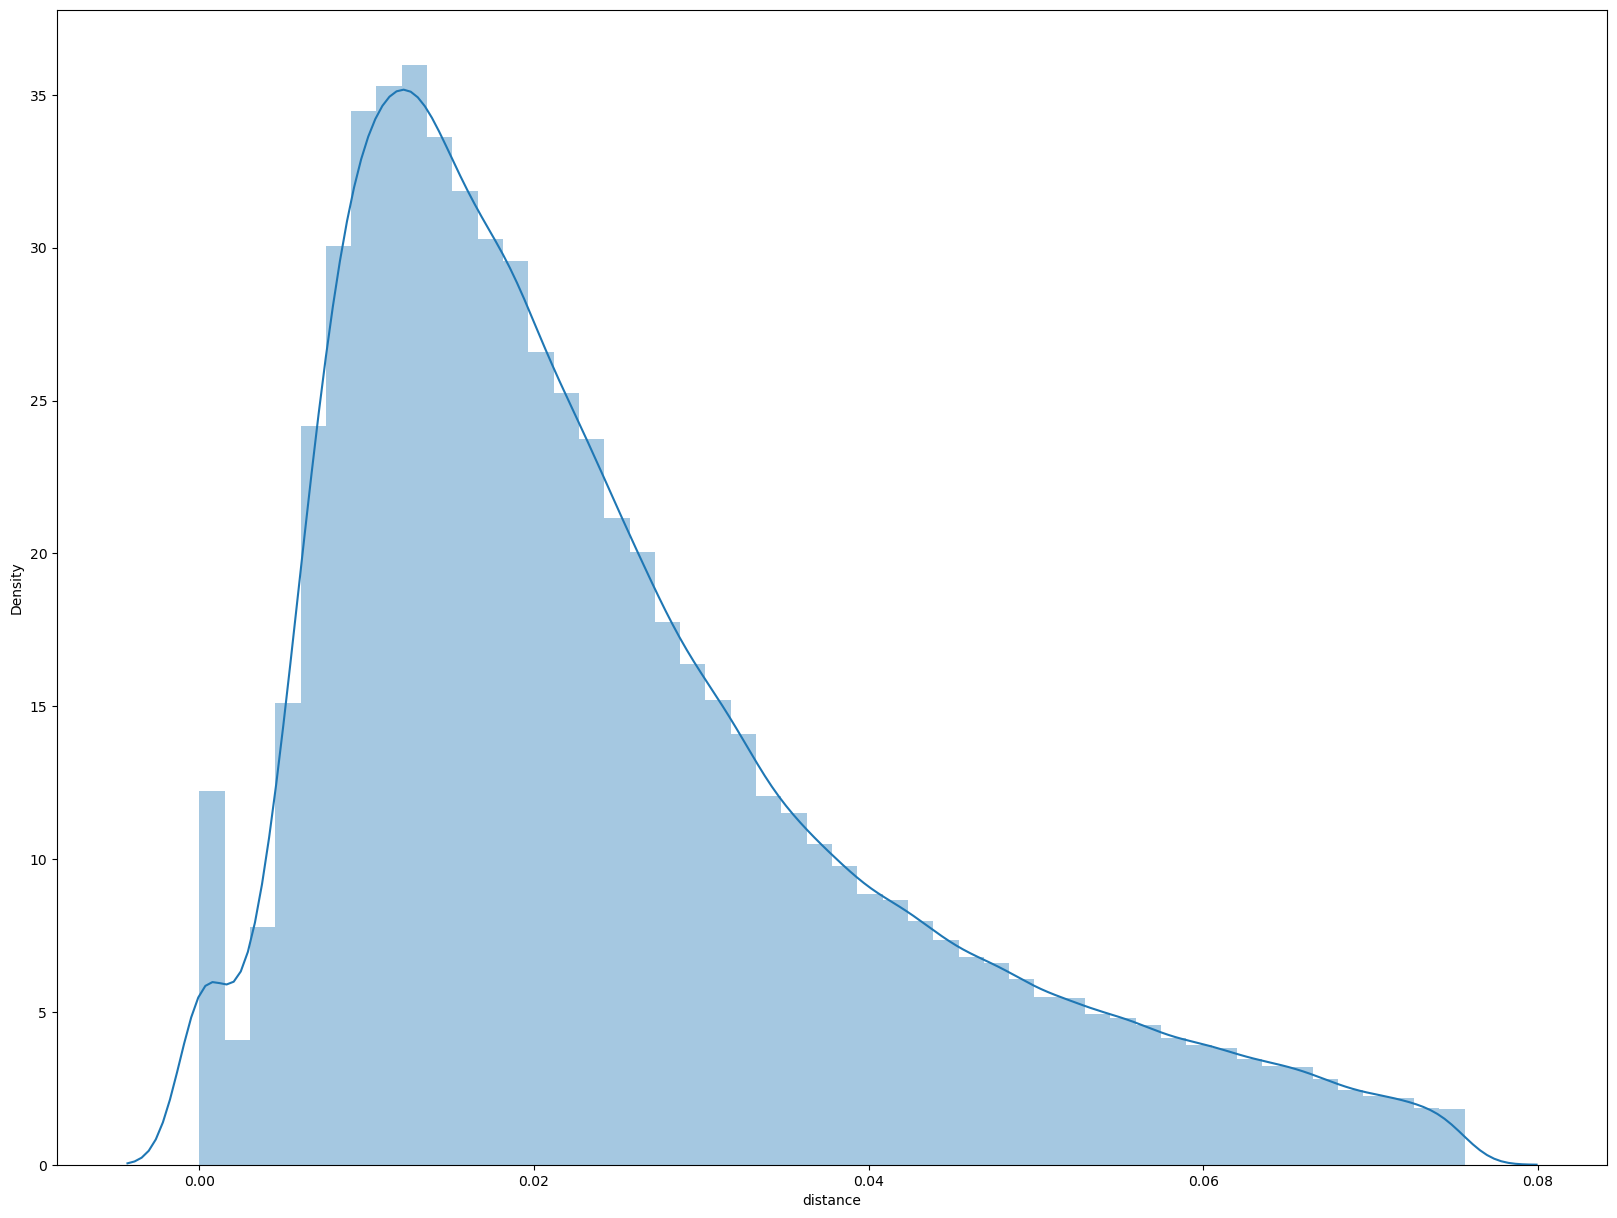

In [87]:
plt.figure(figsize = (20,15))
sns.distplot(df_dum["distance"])

<Axes: ylabel='distance'>

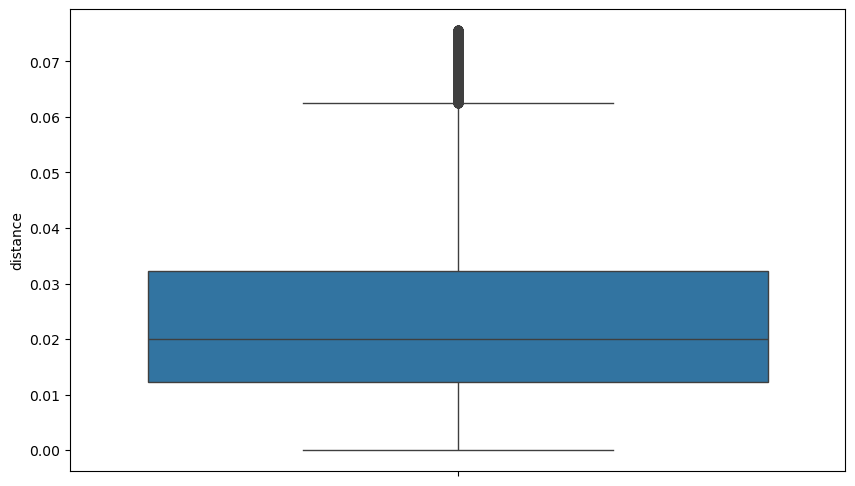

In [88]:
sns.boxplot(df_dum["distance"])

In [89]:
df_dum.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance',
       'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3', 'Monthly_Quarter_Q4',
       'Hourly_Segments_H2', 'Hourly_Segments_H3', 'Hourly_Segments_H4',
       'Hourly_Segments_H5', 'Hourly_Segments_H6', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6'],
      dtype='object')

In [90]:
percentile25 = df_dum["pickup_longitude"].quantile(0.25)
percentile75 = df_dum["pickup_longitude"].quantile(0.75)

In [91]:
IQR = percentile75 - percentile25

In [92]:
IQR

0.022153000000002976

In [93]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [94]:
print(upperlimit)
print(lowerlimit)

-73.93717749999999
-74.0257895


In [95]:
df_dum[df_dum["pickup_longitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.051031,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
217,5.3,-73.934317,40.797407,-73.917871,40.807013,0.019046,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
238,4.0,-73.934953,40.800987,-73.941032,40.798385,0.006612,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
330,11.7,-73.862790,40.768853,-73.910578,40.781952,0.049551,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
361,10.1,-73.928705,40.753475,-73.928705,40.753475,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199683,20.1,-73.917655,40.771112,-73.958235,40.810820,0.056776,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
199696,4.5,-73.912077,40.747605,-73.926048,40.744908,0.014229,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
199786,10.1,-73.831903,40.715133,-73.786172,40.728835,0.047740,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
199901,8.9,-73.930492,40.761509,-73.963917,40.759702,0.033474,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_dum[df_dum["pickup_longitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
457,11.7,-74.030417,40.807683,-74.027813,40.806813,0.002745,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3235,13.3,-74.043873,40.633073,-74.029468,40.640817,0.016355,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6883,4.9,-74.040743,40.708125,-74.040743,40.708125,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9301,46.0,-74.038116,40.713008,-74.038116,40.713008,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11102,80.0,-74.038542,40.737570,-74.038543,40.737567,0.000003,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194616,40.0,-74.029089,40.739910,-74.029086,40.739891,0.000019,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
194842,16.1,-74.030314,40.755675,-74.030314,40.755675,0.000000,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
196454,47.0,-74.048667,40.721347,-74.048670,40.721345,0.000004,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
197583,9.7,-74.046973,40.748875,-74.044745,40.747063,0.002872,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_dum = df_dum.drop(df_dum[df_dum["pickup_longitude"] > upperlimit].index)

In [98]:
df_dum = df_dum.drop(df_dum[df_dum["pickup_longitude"] < lowerlimit].index)

In [99]:
df_dum.shape

(174006, 31)

In [100]:
df_dum["pickup_longitude"].skew()

0.25769329271659125

<Axes: xlabel='pickup_longitude', ylabel='Density'>

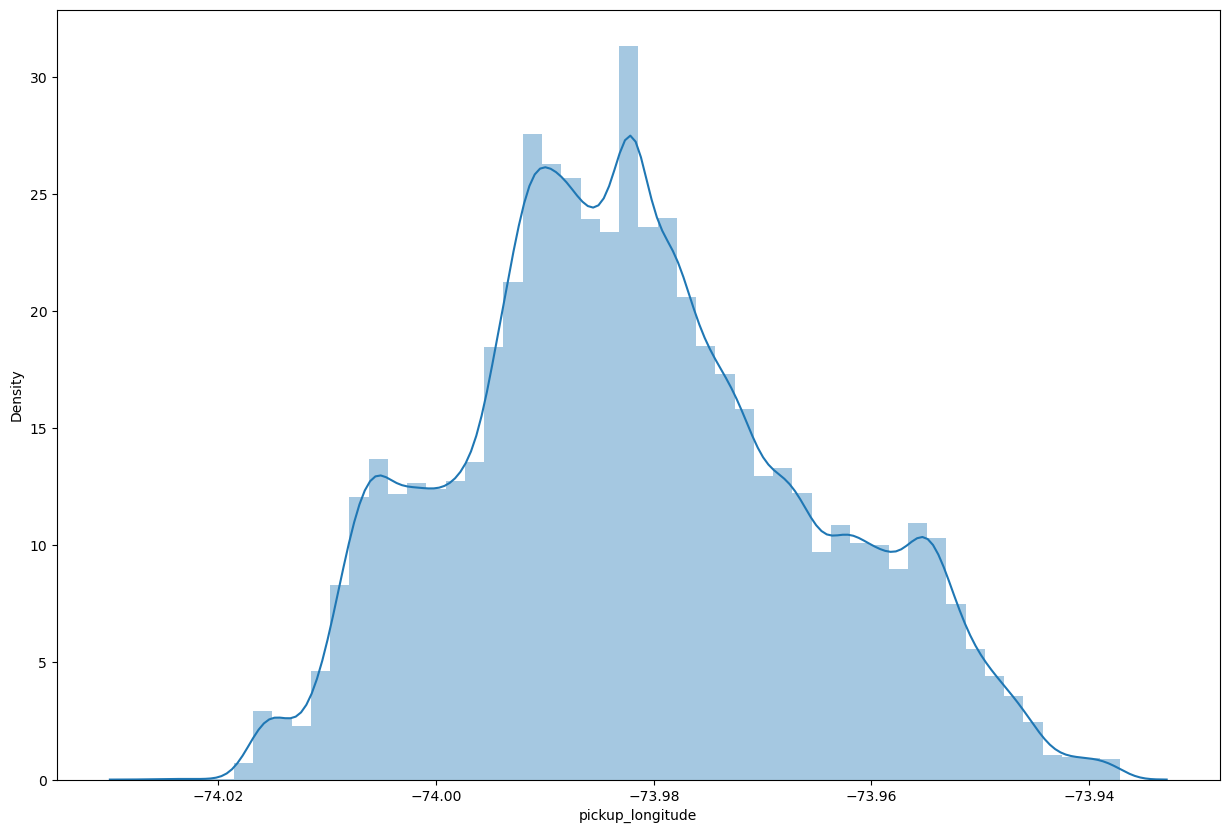

In [101]:
plt.figure(figsize = (15,10))
sns.distplot(df_dum["pickup_longitude"])

<Axes: ylabel='pickup_longitude'>

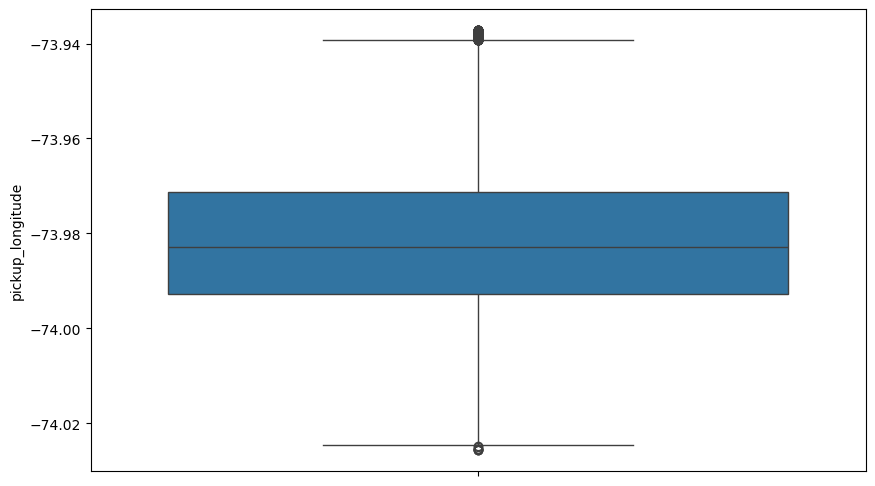

In [102]:
sns.boxplot(df_dum["pickup_longitude"])

In [103]:
percentile25 = df_dum["pickup_latitude"].quantile(0.25)
percentile75 = df_dum["pickup_latitude"].quantile(0.75)

In [104]:
print(percentile25)
print(percentile75)

40.737258
40.766577000000005


In [105]:
IQR = percentile75 - percentile25

In [106]:
IQR

0.02931900000000809

In [107]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [108]:
print("Upper Limit",upperlimit)
print("Lower Limmti",lowerlimit)

Upper Limit 40.81055550000002
Lower Limmti 40.69327949999999


In [109]:
df_dum[df_dum["pickup_latitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
55,11.0,-73.958903,40.815239,-73.980862,40.782610,0.039330,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
279,23.0,-73.962038,40.810655,-73.969157,40.756785,0.054338,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
563,7.3,-73.968347,40.832228,-73.954847,40.833925,0.013606,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
599,7.7,-73.956430,40.813242,-73.934882,40.802430,0.024108,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1216,6.5,-73.945396,40.833561,-73.939423,40.847710,0.015358,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198696,5.5,-73.955085,40.820287,-73.963547,40.808637,0.014399,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
198766,4.5,-73.958748,40.814850,-73.952420,40.816983,0.006678,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199032,19.7,-73.959100,40.814978,-73.908614,40.773083,0.065605,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
199335,30.1,-73.949260,40.812855,-73.949580,40.803735,0.009126,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df_dum[df_dum["pickup_latitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
102,14.9,-73.962218,40.640218,-73.968043,40.640505,0.005832,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
110,18.0,-73.954742,40.687469,-73.988213,40.730511,0.054523,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
282,9.5,-73.988907,40.692223,-74.004700,40.716133,0.028655,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
308,4.5,-73.984958,40.670825,-73.984610,40.664137,0.006697,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
370,7.7,-73.991653,40.684999,-73.968497,40.674008,0.025632,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199521,5.7,-73.960291,40.690591,-73.977109,40.693543,0.017075,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
199551,18.9,-73.988952,40.688598,-73.991053,40.749522,0.060960,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
199714,11.3,-73.970037,40.693205,-73.985160,40.727827,0.037781,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
199784,19.5,-73.979673,40.675340,-73.911750,40.683028,0.068357,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [111]:
df_dum = df_dum.drop(df_dum[df_dum["pickup_latitude"] > upperlimit].index)

In [112]:
df_dum = df_dum.drop(df_dum[df_dum["pickup_latitude"] < lowerlimit].index)

<Axes: xlabel='pickup_latitude', ylabel='Density'>

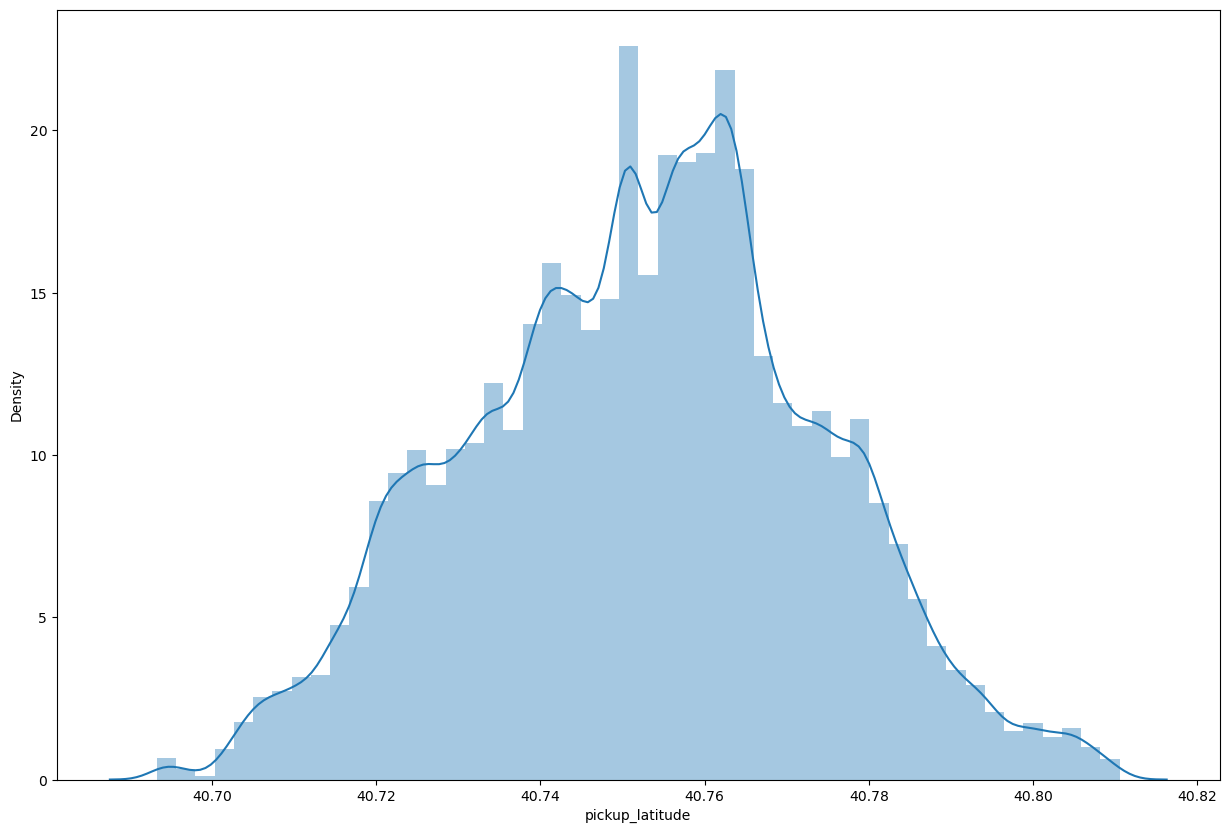

In [113]:
plt.figure(figsize=(15,10))
sns.distplot(df_dum["pickup_latitude"])

In [114]:
df_dum["pickup_latitude"].skew()

-0.039026421263076656

<Axes: ylabel='pickup_latitude'>

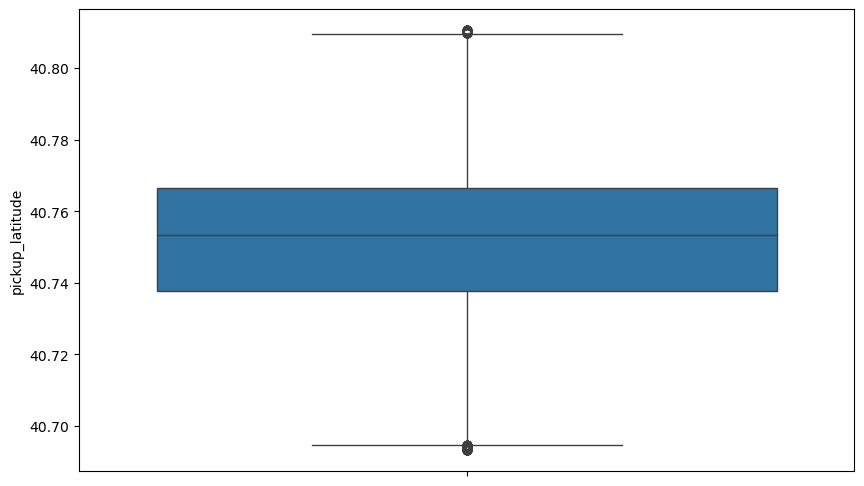

In [115]:
sns.boxplot(df_dum["pickup_latitude"])

In [116]:
percentile25 = df_dum["dropoff_longitude"].quantile(0.25)
percentile75 = df_dum["dropoff_longitude"].quantile(0.75)

In [117]:
print(percentile25)
print(percentile75)

-73.99212
-73.96976599999999


In [118]:
IQR = percentile75 - percentile25

In [119]:
IQR

0.02235400000000709

In [120]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimt = percentile25 - 1.5 * IQR

In [121]:
print("Upper Limit",upperlimit)
print("Lower Limit",lowerlimt)

Upper Limit -73.93623499999998
Lower Limit -74.02565100000001


In [122]:
df_dum[df_dum["dropoff_longitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
99,26.90,-73.990137,40.756007,-73.929361,40.774553,0.063543,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
301,15.00,-73.976850,40.764368,-73.911379,40.747178,0.067690,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
493,16.00,-73.953629,40.767109,-73.905464,40.743778,0.053518,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
823,16.50,-73.974739,40.762650,-73.906914,40.758812,0.067934,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
848,30.83,-73.970098,40.762477,-73.906882,40.768595,0.063511,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199027,12.50,-73.985728,40.723087,-73.926222,40.694812,0.065882,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
199126,13.50,-73.939234,40.805253,-73.916102,40.835948,0.038435,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
199266,12.90,-73.982176,40.771151,-73.922572,40.767460,0.059718,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
199345,30.50,-73.956668,40.800022,-73.903002,40.767738,0.062628,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [123]:
df_dum[df_dum["dropoff_longitude"] < lowerlimt]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
1585,5.3,-74.025577,40.809705,-74.033463,40.806417,0.008544,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3141,61.0,-73.986010,40.767455,-74.028757,40.737142,0.052404,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3781,71.0,-74.009067,40.713615,-74.034217,40.712527,0.025174,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6316,10.1,-73.989397,40.748763,-74.029615,40.748250,0.040221,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10344,48.0,-73.984281,40.737303,-74.035905,40.722867,0.053604,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185888,21.7,-73.979428,40.727389,-74.045912,40.722736,0.066647,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194219,42.0,-73.984352,40.764688,-74.029082,40.743701,0.049409,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
195340,65.0,-74.007992,40.714852,-74.042712,40.715697,0.034730,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
196670,52.5,-73.997262,40.752123,-74.031957,40.717050,0.049334,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [124]:
df_dum = df_dum.drop(df_dum[df_dum["dropoff_longitude"] > upperlimit].index)

In [125]:
df_dum = df_dum.drop(df_dum[df_dum["dropoff_longitude"] < lowerlimt].index)

In [126]:
df_dum.shape

(169627, 31)

In [127]:
df_dum["dropoff_longitude"].skew()

0.23740140250206296

<Axes: xlabel='dropoff_longitude', ylabel='Density'>

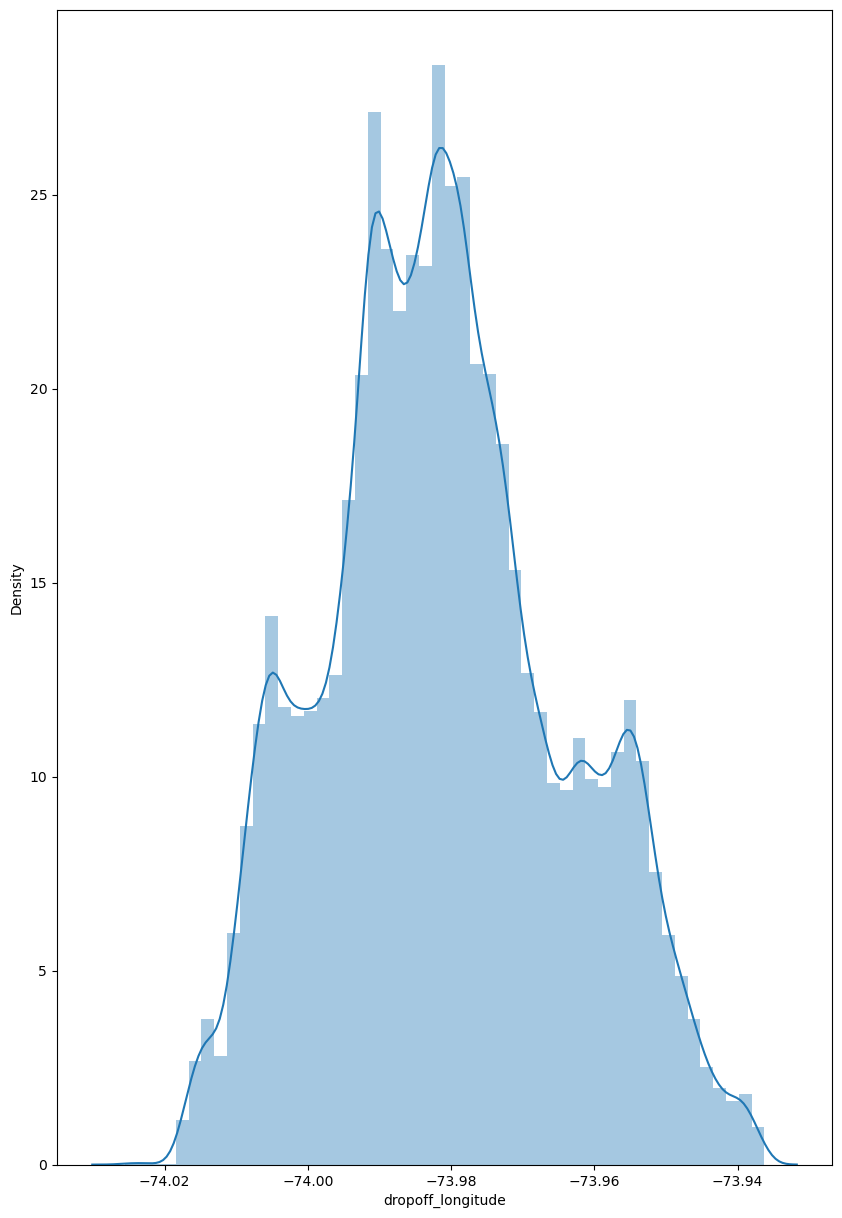

In [128]:
plt.figure(figsize = (10,15))
sns.distplot(df_dum["dropoff_longitude"])

<Axes: ylabel='dropoff_longitude'>

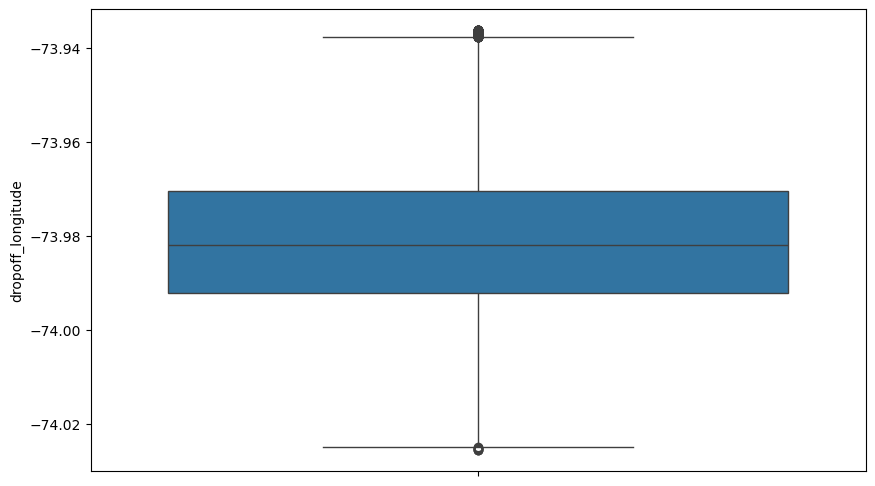

In [129]:
sns.boxplot(df_dum["dropoff_longitude"])

In [130]:
percentile25 = df_dum["dropoff_latitude"].quantile(0.25)
percentile75 = df_dum["dropoff_latitude"].quantile(0.75)

In [131]:
print(percentile25)
print(percentile75)

40.737314500000004
40.767153


In [132]:
IQR = percentile75 - percentile25

In [133]:
IQR

0.02983849999999677

In [134]:
upperlimit = percentile75 + 1.5 * IQR
lowerlimit = percentile25 - 1.5 * IQR

In [135]:
print("Upper Limit", upperlimit)
print("Lower Limit", lowerlimit)

Upper Limit 40.811910749999996
Lower Limit 40.69255675000001


In [136]:
df_dum[df_dum["dropoff_latitude"] > upperlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
398,19.0,-73.973711,40.759206,-73.951506,40.822800,0.067359,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
548,12.9,-73.973569,40.792419,-73.940528,40.845458,0.062489,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
728,8.9,-73.963290,40.798763,-73.939785,40.823718,0.034282,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1037,8.6,-73.974776,40.795081,-73.955565,40.821284,0.032491,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1343,6.5,-73.954185,40.806500,-73.957432,40.821095,0.014952,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198112,6.9,-73.974527,40.788177,-73.959297,40.813658,0.029686,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
198485,7.0,-73.947861,40.804375,-73.960693,40.818008,0.018723,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
198726,12.5,-73.949695,40.772808,-73.961397,40.813232,0.042084,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
198866,6.5,-73.959187,40.809550,-73.944922,40.815773,0.015563,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [137]:
df_dum[df_dum["dropoff_latitude"] < lowerlimit]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2011,year_2012,year_2013,year_2014,year_2015,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
135,8.9,-74.008055,40.711553,-73.997185,40.679587,0.033764,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,9.5,-73.995559,40.695197,-73.974702,40.687741,0.022150,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
298,15.0,-74.006209,40.714462,-73.990402,40.665240,0.051698,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
322,19.3,-73.995176,40.750516,-73.971411,40.680955,0.073509,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
326,16.0,-73.962799,40.711994,-73.983766,40.679293,0.038845,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199662,16.0,-73.988305,40.737817,-73.982477,40.686312,0.051834,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
199830,4.9,-73.990646,40.693612,-73.999476,40.688579,0.010164,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
199865,14.5,-73.986748,40.722276,-73.991725,40.687732,0.034901,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
199889,10.2,-74.003892,40.722310,-73.997934,40.687450,0.035365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df_dum = df_dum.drop(df_dum[df_dum["dropoff_latitude"] > upperlimit].index)

In [139]:
df_dum = df_dum.drop(df_dum[df_dum["dropoff_latitude"] < lowerlimit].index)

In [140]:
df_dum.shape

(166452, 31)

<Axes: xlabel='dropoff_latitude', ylabel='Density'>

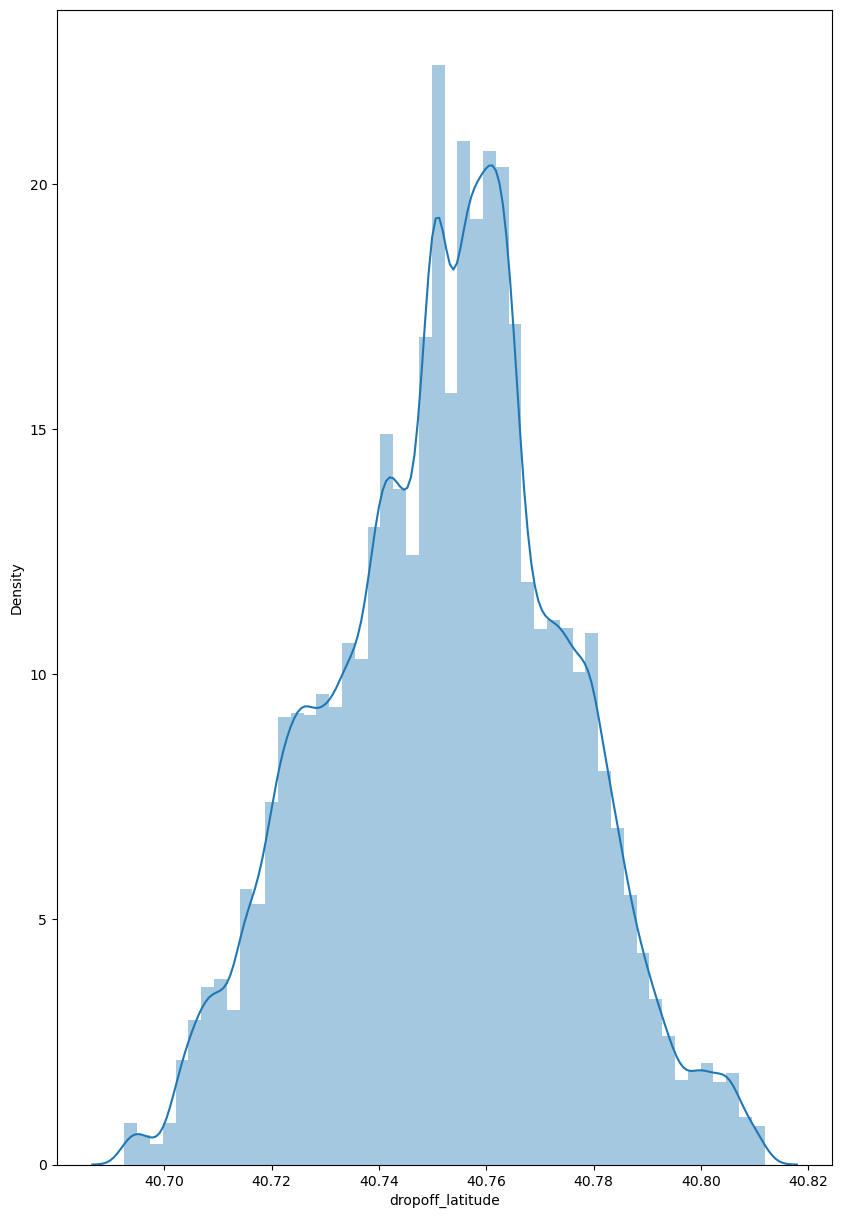

In [141]:
plt.figure(figsize = (10,15))
sns.distplot(df_dum["dropoff_latitude"])

In [142]:
df_dum["dropoff_latitude"].skew()

-0.07278955800651316

<Axes: ylabel='dropoff_latitude'>

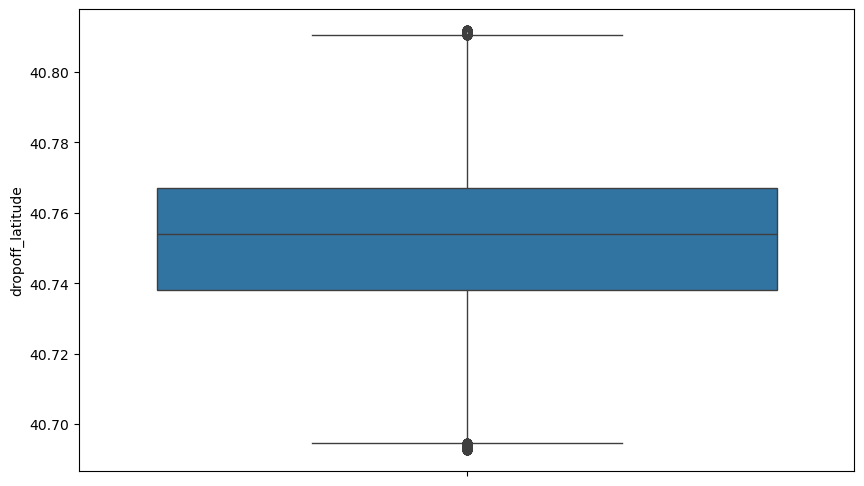

In [143]:
sns.boxplot(df_dum["dropoff_latitude"])

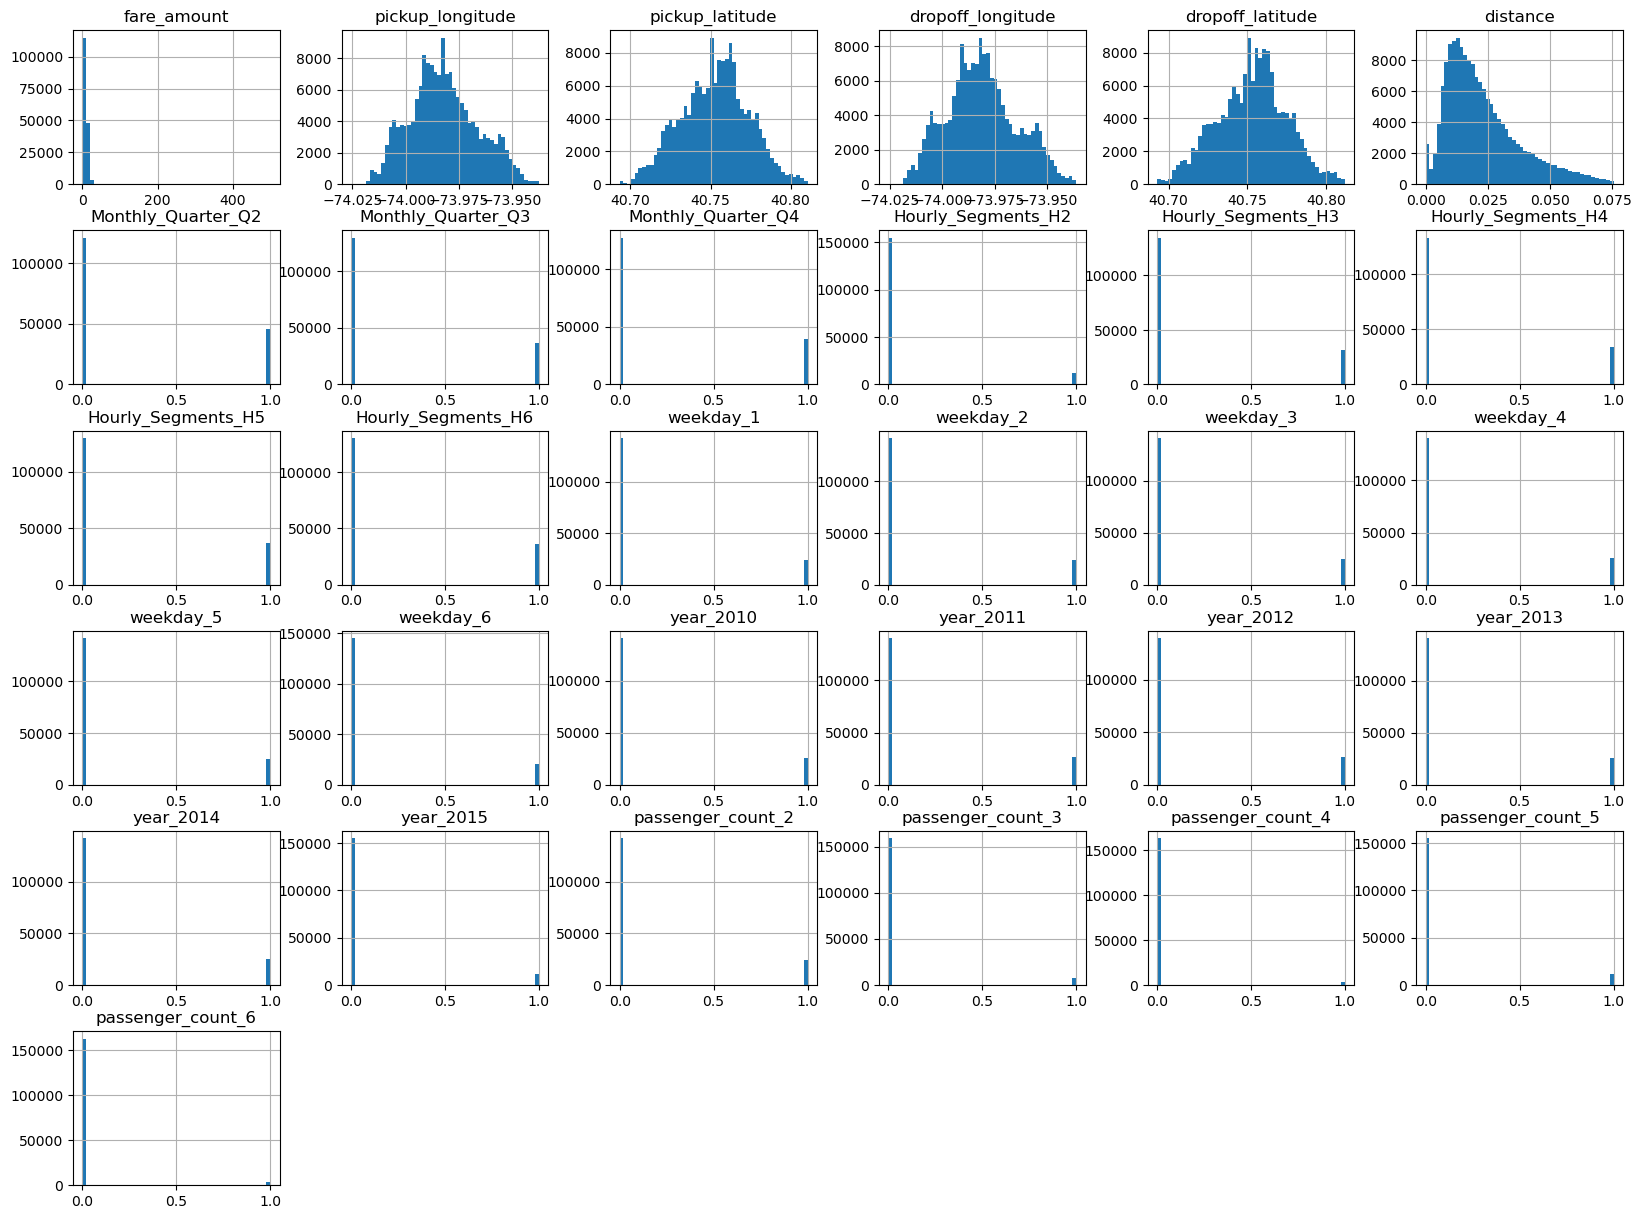

In [144]:
df_dum.hist(bins=50, figsize=(20, 15))
plt.show()

In [145]:
df_dum.shape

(166452, 31)

In [147]:
#Splitting the data intro training & testing sets
m = []

for i in df_dum.columns.values:
    m.append(i.replace(" ","_"))
    
df_dum.columns = m

X = df_dum.drop(["fare_amount"],axis = 1)
y = df_dum["fare_amount"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(166452, 30) (166452,) (133161, 30) (33291, 30) (133161,) (33291,)


In [148]:
#Feature Scaling (Standardization)
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [149]:
X_train_std

array([[-0.16732826,  0.33250022,  0.6221327 , ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [-0.55195086, -0.11457591, -0.11869841, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [ 0.277753  , -0.15618432, -0.35946852, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       ...,
       [ 0.70310035, -0.02950243, -0.19211791, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [ 0.6446528 , -0.10238855, -0.95364161, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [ 0.55019401,  0.2360963 , -0.1624364 , ..., -0.14907635,
        -0.2732063 , -0.14820548]])

In [150]:
X_test_std

array([[-0.33600915,  0.06613977,  0.34395906, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [ 1.64140354,  1.3924196 ,  0.81361462, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [-0.76424746, -0.8426754 , -1.44604092, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       ...,
       [ 0.93148574,  0.20653243, -1.3188086 , ...,  6.70797221,
        -0.2732063 , -0.14820548],
       [-0.63352605,  0.11303254, -0.29190086, ..., -0.14907635,
        -0.2732063 , -0.14820548],
       [ 1.56341062, -1.67346291, -0.01125377, ..., -0.14907635,
        -0.2732063 , -0.14820548]])

# Linear Regression

lr = LinearRegression()

In [152]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [153]:
print("Train Accuracy", lr.score(X_train_std,y_train))
print("Test Accuracy", lr.score(X_test_std,y_test))

Train Accuracy 0.479138204837514
Test Accuracy 0.5605122435484344


In [155]:
# Ridge
ridge = Ridge(random_state=0,alpha=0.1)

In [156]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, random_state=0)

In [157]:
print("Train Accuracy",ridge.score(X_train,y_train))
print("Test Accuracy", ridge.score(X_test,y_test))

Train Accuracy 0.4791331155438191
Test Accuracy 0.5604579488491735


# Random Forest Regressor

In [159]:
X,y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [161]:
rf = RandomForestRegressor(max_depth=11, random_state=0)

In [162]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [163]:
print("Train Accuracy", rf.score(X_train,y_train))
print("Test Accuracy", rf.score(X_test,y_test))

Train Accuracy 0.9900316636942278
Test Accuracy 0.9473084711151801


# Xgboost

In [166]:
# Model  xgboost 
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 

In [167]:
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', max_depth = 6,
                        max_leaf_nodes = 2,
                        n_estimators = 165, seed = 123) 

In [168]:
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaf_nodes=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=165,
             n_jobs=None, num_parallel_tree=None, ...)

In [170]:
y_pred = xgb_r.predict(X_test)

In [171]:
y_pred

array([-35.651592  , -61.621086  ,  36.388824  ,   6.3249397 ,
       -12.694076  ,  -3.0274062 ,  59.47407   , -18.183739  ,
        11.017796  ,  81.4349    ,   3.84164   , -20.389973  ,
       -38.96638   ,   0.94764614, -41.223186  , -42.9405    ,
        53.885746  , -13.113141  ,  57.687923  , -21.904516  ],
      dtype=float32)

In [172]:
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse))

RMSE :  8.616447


In [173]:
print("Train Accuracy",xgb_r.score(X_train,y_train))
print("Test Accuracy", xgb_r.score(X_test,y_test))

Train Accuracy 0.9999999991572491
Test Accuracy 0.9629371637511809
